# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


## Objectives


Sales forecasting is the process of estimating future sales. Accurate sales forecasts enable companies to make sound business decisions and predict short-term or long-term performance. Forecasts could be based on data such as past sales, industry-wide comparisons, and economic trends.


A leading retailer in the USA wants to forecast sales for their product categories in their store, based on the sales history of each category. Sales or revenue forecasting is very important for retail operations. Forecasting of retail sales helps the retailer to take necessary measures to plan their budgets or investments in a period (monthly, yearly) among different product categories like women's clothing, men's clothing, and other clothing. Further, they can plan to minimize revenue loss from the unavailability of products by investing accordingly.

**Note: This data is proprietary. Please DO NOT share the dataset with anyone. The solution python notebook and test solution will not be provided.** </br>

In [166]:
#@title Mini Hackathon Walkthrough Video
from IPython.display import HTML

HTML("""<video width="800" height="600" controls>
  <source src="https://cdn.exec.talentsprint.com/content/mini_hackathon_walkthrough.mp4" type="video/mp4">
</video>
""")

## Kaggle link and deadline:


### 1. Link to the Kaggle problem: https://www.kaggle.com/t/3ceb84fead1d4550bfba31b037f79d8a

### 2. Deadlines:
  - **Competition closes at** 6:00pm IST or 12:30pm UTC, 23rd Jan 2021 
  - **Submit this Colab file with code to aimlkaggle@gmail.com:** 
      
      7.00pm IST or 1:30pm UTC 23rd Jan 2021

## Instructions:

- Refer to the document **MiniHackathon- Kaggle Team Creation** for creating a Kaggle account. After login into the Kaggle account, access the kaggle problem. Follow the steps for Team creation in Kaggle.
- Under the 'Data' tab within the Kaggle competition page (link above), you can find four datasets. Their attributes are given in the "Attributes description".
- Follow **Stage 1** for downloading the data 
- Combine the datasets and apply data-preprocessing to obtain a clean training dataset
- Build your own model using any algorithms learned till now
- **Get the Sales predictions for 2015 month-wise and product-wise** (36 rows)
- Copy and paste the predictions in column B (Sales(In ThousandDollars)) of the **Sample_Submission csv file** (ignore the headers)
- Upload the Sample_Submission csv file into Kaggle by clicking on Submit Predictions in Kaggle.
- The leaderboard takes and reflects your best submission until the specified deadline (maximum of 20 submissions only acceptable per day based on UTC (0:00) timing). 

### **Important: Only the Public Leaderboard rankings are valid, not the Private Leaderboard rankings.**

## Evaluation: 
The evaluation will be done based on the teams placed on the Kaggle leaderboard

**TotalMarks=30**

- The top 4 teams will be awarded 30 marks
- 5-8 teams will be awarded 27
- 9-12 teams will be awarded 24
- The rest of the teams will be awarded 21
- **0 Marks in case of 0 submissions**
 

 ## Finally...
    Don't cheat!
    Apply yourself!
    Have fun!


## **Stage1:** Setting up colab for Kaggle competitions 
This setup helps you directly access the datasets etc of the Kaggle competition.

### 1. Create an API key in Kaggle.

To do this, go to kaggle.com/ and open your user settings page. Click My Account.

![alt text](https://i.stack.imgur.com/jxGQv.png
)



### 2. Next, scroll down to the API access section and click generate to download an API key. 
![alt text](https://i.stack.imgur.com/Hzlhp.png)

### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [167]:
#from google.colab import files
#files.upload()

In [168]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

data/                  df_train_weather_eco.csv               kaggle.json
datasetsprocessed.csv  df_train_weather_eco_holidays.csv      SalesForcast.csv
df_train_weather.csv   df_train_weather_eco_holidays_new.csv  sample_data/


### 4. Install the Kaggle API using the following command


In [169]:
!pip install -q kaggle

### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [170]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [171]:
#Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [172]:
!chmod 600 /root/.kaggle/kaggle.json #run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the data

In [173]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


**NOTE: If you get a '404 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

In [174]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c retail-case-study-batch15 -p data


Events_HolidaysData.xlsx: Skipping, found more recently modified local copy (use --force to force download)
WeatherData.xlsx: Skipping, found more recently modified local copy (use --force to force download)
Sample_Submission.csv: Skipping, found more recently modified local copy (use --force to force download)
AttributesDescription.xlsx: Skipping, found more recently modified local copy (use --force to force download)
Train_Kaggle.csv: Skipping, found more recently modified local copy (use --force to force download)
MacroEconomicData.xlsx: Skipping, found more recently modified local copy (use --force to force download)
Test_Kaggle.csv: Skipping, found more recently modified local copy (use --force to force download)


## **Stage 2:** YOUR CODE to crack the Kaggle problem here. 

1.  Get the Sales prediction for the 2015 month-wise and product-wise (which give 36 rows). The product order for every month prediction can be as per the test_kaggle.csv file.

2.  Copy and paste the predictions in Sample_Submission.csv (in Sales(In ThousandDollars)) and upload  them in to Kaggle.

After uploading the predictions in Kaggle, the RMSE score will be displayed on the leaderboard.

Understand the RMSE score [here](https://medium.com/analytics-vidhya/forecast-kpi-rmse-mae-mape-bias-cdc5703d242d) with an example.

**Note: It is best advised to write all the code here. (If for any reason you are using other colab files, you could cut and paste the code from there into this notebook)**

###import libraries

In [175]:
import pandas as pd
import calendar
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import sklearn
import math


from torch import nn
import torch

from pandas import read_csv, DataFrame
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')


### Load and display heads of all datasets


In [176]:
#  <All Code here>
df_train = pd.read_csv('/content/data/Train_Kaggle.csv')
df_test = pd.read_csv('/content/data/Test_Kaggle.csv')
df_holidays = pd.read_excel('/content/data/Events_HolidaysData.xlsx')
df_economic = pd.read_excel('/content/data/MacroEconomicData.xlsx')
df_weather = pd.read_excel('/content/data/WeatherData.xlsx')

print('df_train')
print(df_train.head())
print(df_train.tail())

print('df_test')
print(df_test.head())
print(df_test.tail())

print('df_holidays')
print(df_holidays.head())

print('df_economic')
print(df_economic.head())

print('df_weather')
print(df_weather.head())


df_train
   Year  Month ProductCategory  Sales(In ThousandDollars)
0  2009      1   WomenClothing                     1755.0
1  2009      1     MenClothing                      524.0
2  2009      1   OtherClothing                      936.0
3  2009      2   WomenClothing                     1729.0
4  2009      2     MenClothing                      496.0
     Year  Month ProductCategory  Sales(In ThousandDollars)
211  2014     11     MenClothing                      803.0
212  2014     11   OtherClothing                     1468.0
213  2014     12   WomenClothing                     5664.0
214  2014     12     MenClothing                     1070.0
215  2014     12   OtherClothing                     1967.0
df_test
   Year  Month ProductCategory  Sales(In ThousandDollars)
0  2015      1   WomenClothing                        NaN
1  2015      1     MenClothing                        NaN
2  2015      1   OtherClothing                        NaN
3  2015      2   WomenClothing             

### check all columns 


In [177]:
print('df_train')
print(df_train.columns) 


print('df_test')
print(df_test.columns)


print('df_holidays')
print(df_holidays.columns)

print('df_economic')
print(df_economic.columns) 

print('df_weather')
print(df_weather.columns)


df_train
Index(['Year', 'Month', 'ProductCategory', 'Sales(In ThousandDollars)'], dtype='object')
df_test
Index(['Year', 'Month', 'ProductCategory', 'Sales(In ThousandDollars)'], dtype='object')
df_holidays
Index(['Year', 'MonthDate', 'Event', 'DayCategory'], dtype='object')
df_economic
Index(['Year-Month', 'Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'PartyInPower',
       'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'AdvertisingExpenses (in Thousand Dollars)',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports'

### check each dataset shape


In [178]:
print('df_train shape')
print(df_train.shape)
print('df_holidays shape')
print(df_holidays.shape)
print('df_economic shape')
print(df_economic.shape)
print('df_weather shape')
print(df_weather.shape)

df_train shape
(216, 4)
df_holidays shape
(150, 4)
df_economic shape
(96, 18)
df_weather shape
(365, 23)


### Check missing values in each data set

In [179]:
print('df_train missing')
print(df_train.isnull().sum()) # There are 12 missing values in sales

print('df_test missing')
print(df_test.isnull().sum()) # There are 36 missing values in sales

print('df_holidays missing')
print(df_holidays.isnull().sum()) # There no missing value

print('df_economic missing')
print(df_economic.isnull().sum()) # There are no missing values

print('df_weather missing')
print(df_weather.isnull().sum()) # There are 225 values in WeatherEvent                   

 

df_train missing
Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    12
dtype: int64
df_test missing
Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    36
dtype: int64
df_holidays missing
Year           0
MonthDate      0
Event          0
DayCategory    0
dtype: int64
df_economic missing
Year-Month                                                           0
Monthly Nominal GDP Index (inMillion$)                               0
Monthly Real GDP Index (inMillion$)                                  0
CPI                                                                  0
PartyInPower                                                         0
unemployment rate                                                    0
CommercialBankInterestRateonCreditCardPlans                          0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan  

### Cleaning and preprocessing the required datasets

#### fil non values for df_train

In [180]:
df_train = df_train.fillna(df_train.median())
print('df_train missing')
print(df_train.isnull().sum()) # There are 0 missing values 

df_train missing
Year                         0
Month                        0
ProductCategory              0
Sales(In ThousandDollars)    0
dtype: int64


#### fil non values for df_test

In [181]:
df_test = df_test.fillna(df_test.median())
print('df_test missing')
print(df_test.isnull().sum()) # There are 0 missing values 

df_test missing
Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    36
dtype: int64


####Preprocessing df_train and df_test datasets

In [182]:
def train_test_preprocess(df_data):
    df_data.columns = ['year','month','productcategory','target'] # For the ease of reading we renamed the columns
    df_data[['year','month']] = df_data[['year','month']].astype(str) # converting year and month into string for the splitting purpose
    df_data['year-month'] = df_data.year.str[:4] + "-" + df_data.month.str[:2] # updating the dataset by adding 'year-month' for the joining purpose 
    #pd.to_datetime(df_data['year-month'])
    le.fit(df_data['productcategory']) # ueing label encoder to encode and transform both (productcategory) column
    df_data['productcategory'] = le.transform(df_data['productcategory'])
    df_data = df_data[['target','year-month', 'productcategory']]
    return df_data

trainWomen = training_df.loc[training_df['ProductCategory'] == 'WomenClothing']
trainMen = training_df.loc[training_df['ProductCategory'] == 'MenClothing']
trainOthes = training_df.loc[training_df['ProductCategory'] == 'OtherClothing']

frames = [trainWomen, trainMen, trainOthes]
train_all = pd.concat(frames)

print(train_all.head())

In [183]:
# process the training set
df_train = train_test_preprocess(df_train) 
print(df_train.shape, df_train.head())
print(df_train.tail())

(216, 3)    target year-month  productcategory
0  1755.0     2009-1                2
1   524.0     2009-1                0
2   936.0     2009-1                1
3  1729.0     2009-2                2
4   496.0     2009-2                0
     target year-month  productcategory
211   803.0    2014-11                0
212  1468.0    2014-11                1
213  5664.0    2014-12                2
214  1070.0    2014-12                0
215  1967.0    2014-12                1


###Preprocessing df_weather

#### creating 8 datasets based on years weather dataset


In [184]:
# Read the excel weather dataset 8 times and save it as csv file for each each
weather_2009 = pd.read_excel('/content/data/WeatherData.xlsx', sheet_name='2009')
weather_2009.to_csv('/content/data/weather_2009.csv', index= False)
print(weather_2009.head())
print(weather_2009.tail())

weather_2010 = pd.read_excel('/content/data/WeatherData.xlsx', sheet_name='2010')
weather_2010.to_csv('/content/data/weather_2010.csv', index= False)
print(weather_2010.head())
print(weather_2010.tail())

weather_2011 = pd.read_excel('/content/data/WeatherData.xlsx', sheet_name='2011')
weather_2011.to_csv('/content/data/weather_2011.csv', index= False)
print(weather_2011.head())
print(weather_2011.tail())

weather_2012 = pd.read_excel('/content/data/WeatherData.xlsx', sheet_name='2012')
weather_2012.to_csv('/content/data/weather_2012.csv', index= False)
print(weather_2012.head())
print(weather_2012.tail())

weather_2013 = pd.read_excel('/content/data/WeatherData.xlsx', sheet_name='2013')
weather_2013.to_csv('/content/data/weather_2013.csv', index= False)
print(weather_2013.head())
print(weather_2013.tail())

weather_2014 = pd.read_excel('/content/data/WeatherData.xlsx', sheet_name='2014')
weather_2014.to_csv('/content/data/weather_2014.csv', index= False)
print(weather_2014.head())
print(weather_2014.tail())

weather_2015 = pd.read_excel('/content/data/WeatherData.xlsx', sheet_name='2015')
weather_2015.to_csv('/content/data/weather_2015.csv', index= False)
print(weather_2015.head())
print(weather_2015.tail())

weather_2016 = pd.read_excel('/content/data/WeatherData.xlsx', sheet_name='2016')
weather_2016.to_csv('/content/data/weather_2016.csv', index= False)
print(weather_2016.head())
print(weather_2016.tail())

   Year Month  Day  ...  Wind (km/h) high  Precip. (mm) sum  WeatherEvent
0  2009   Jan    1  ...                60                 0           NaN
1  2009   Jan    2  ...                48                 T          Snow
2  2009   Jan    3  ...                42                 T           NaN
3  2009   Jan    4  ...                40                 0           NaN
4  2009   Jan    5  ...                34                 T           NaN

[5 rows x 23 columns]
     Year Month  Day  ...  Wind (km/h) high  Precip. (mm) sum  WeatherEvent
360  2009   Dec   27  ...                47              8.38          Rain
361  2009   Dec   28  ...                47                 0           NaN
362  2009   Dec   29  ...                64                 T           NaN
363  2009   Dec   30  ...                35                 0           NaN
364  2009   Dec   31  ...                27              5.84    Fog , Snow

[5 rows x 23 columns]
   Year Month  Day  ...  Wind (km/h) high  Precip. (mm

#### Assinging a readable coloumns names

In [185]:
weather_2009.columns

Index(['Year', 'Month', 'Day', 'Temp high (°C)', 'Temp avg (°C)',
       'Temp low (°C)', 'Dew Point high (°C)', 'Dew Point avg (°C)',
       'Dew Point low (°C)', 'Humidity (%) high', 'Humidity (%) avg',
       'Humidity (%) low', 'Sea Level Press. (hPa) high',
       'Sea Level Press. (hPa) avg', 'Sea Level Press. (hPa) low',
       'Visibility (km) high', 'Visibility (km) avg', 'Visibility (km) low',
       'Wind (km/h) low', 'Wind (km/h) avg', 'Wind (km/h) high',
       'Precip. (mm) sum', 'WeatherEvent'],
      dtype='object')

In [186]:
# for the ease of reading columns, we renamed the long names
df_weather.columns = ['year', 'month','day','temp_high','temp_avg','temp_low','dew_point_high','dew_point_avg',
                'dew_point_low','humidity_high','humidity_avg','humidity_low','pressure_high','pressure_avg','pressure_low',
                'visibility_high','visibility_avg','visibility_low','wind_low','wind_avg','wind_high','precip_sum','weatherevent']

print('df_weather')
print(df_weather.columns)

df_weather
Index(['year', 'month', 'day', 'temp_high', 'temp_avg', 'temp_low',
       'dew_point_high', 'dew_point_avg', 'dew_point_low', 'humidity_high',
       'humidity_avg', 'humidity_low', 'pressure_high', 'pressure_avg',
       'pressure_low', 'visibility_high', 'visibility_avg', 'visibility_low',
       'wind_low', 'wind_avg', 'wind_high', 'precip_sum', 'weatherevent'],
      dtype='object')


In [187]:
def weather_preprocess(df_data):


    # for the ease of reading columns, we renamed the long names
    df_data.columns = ['year', 'month', 'day', 'temp_high','temp_avg','temp_low','dew_point_high','dew_point_avg',
                    'dew_point_low','humidity_high','humidity_avg','humidity_low','pressure_high','pressure_avg','pressure_low',
                    'visibility_high','visibility_avg','visibility_low','wind_low','wind_avg','wind_high','precip_sum','weatherevent']
                    
    # we convert the columns (year and month) datatypes to a string for the joining purposes
    df_data[['year','day' , 'month', 'precip_sum','weatherevent']] = df_data[['year', 'day',  'month', 'precip_sum','weatherevent']].astype(str)

    # we convert all the (remaining) columns into numerical datatype
    df_data[['temp_high','temp_avg','temp_low','dew_point_high','dew_point_avg',
                  'dew_point_low','humidity_high','humidity_avg','humidity_low','pressure_high','pressure_avg','pressure_low',
                 'visibility_high','visibility_avg','visibility_low','wind_low','wind_avg','wind_high']] = df_data[['temp_high','temp_avg','temp_low','dew_point_high','dew_point_avg',
                  'dew_point_low','humidity_high','humidity_avg','humidity_low','pressure_high','pressure_avg','pressure_low',
                 'visibility_high','visibility_avg','visibility_low','wind_low','wind_avg','wind_high']].apply(pd.to_numeric, errors = "coerce")

    # we filled the missing values with (median) of the corresponding column to avoid the outlier values we did not use mean 
    df_data = df_data.fillna(df_data.median())

    # Here, we scaled all the numerical attributes by range method  
    df_numerical = df_data.select_dtypes(include=[np.number]) # Only include numeric columns
    df_normalize = (df_numerical - df_numerical.mean()) / (df_numerical.max() - df_numerical.min()) # function to scale the numeric columns
    df_data[df_normalize.columns] = df_normalize # updating the weather data frame by adding the normalized columns 

    return df_data


#### Aggreagating weather datast

In [188]:
def df_weathr_aggregate(df_data):
    #First, we converted the column (year) to integer
    df_data['year'] = df_data['year'].astype(int)
    # Then, we grouped all the weather attributes based on column (month) eg. temp/31 in Jan
    df_weather_aggregated = df_data.groupby('month').mean() 
    
    #Specifiy the column (month) by inserting the following list of pattern months   
    month = ["4", "8", "12", "2", "1","7", "6", "3", "5", "11", "10", "9"]
    df_weather_aggregated.insert(loc=0, column='month', value=month)
    
    # Again, the column (year) be converted to string for the joining purpose  
    df_weather_aggregated['year'] = df_weather_aggregated['year'].astype(str)
    
    # Then, create a new column (year-month) for the joining purpose 
    df_weather_aggregated['year-month'] = df_weather_aggregated.year.str[:4] + "-" + df_weather_aggregated.month.str[:2]
    #pd.to_datetime(df_weather_aggregated['year-month'])
    
    # Finaly, converth the column (month) into integer  
    df_weather_aggregated['month'] = df_weather_aggregated['month'].astype(int)
    return df_weather_aggregated

### Aggreage the eight years and preprocessing weather dataset to construct 8 dataframe from 2009 to 2016

In [189]:
weather_2009 = pd.read_csv('/content/data/weather_2009.csv')
print(weather_2009.head())
print(weather_2009.shape)
df9 = df_weathr_aggregate(weather_preprocess(weather_2009)) # 12 rows 21 column
print(df9.head())
print(df9.shape)
print(df9.columns)



   Year Month  Day  ...  Wind (km/h) high  Precip. (mm) sum  WeatherEvent
0  2009   Jan    1  ...                60                 0           NaN
1  2009   Jan    2  ...                48                 T          Snow
2  2009   Jan    3  ...                42                 T           NaN
3  2009   Jan    4  ...                40                 0           NaN
4  2009   Jan    5  ...                34                 T           NaN

[5 rows x 23 columns]
(365, 23)
       month  year  temp_high  ...  wind_avg  wind_high  year-month
month                          ...                                 
Apr        4  2009   0.023907  ...  0.052913   0.058233      2009-4
Aug        8  2009   0.282663  ... -0.129495  -0.116042      2009-8
Dec       12  2009  -0.253435  ...  0.136311   0.107809     2009-12
Feb        2  2009  -0.217419  ...  0.086818   0.089690      2009-2
Jan        1  2009  -0.365570  ...  0.078247   0.054535      2009-1

[5 rows x 21 columns]
(12, 21)
Index(['month',

In [190]:
weather_2010 = pd.read_csv('/content/data/weather_2010.csv')
print(weather_2010.head())
print(weather_2010.shape)
df10 = df_weathr_aggregate(weather_preprocess(weather_2010)) # 12 rows 21 column
print(df10.head())
print(df10.shape)

   Year Month  Day  ...  Wind (km/h) high  Precip. (mm) sum  WeatherEvent
0  2010   Jan    1  ...                35              0.76          Snow
1  2010   Jan    2  ...                56              0.51          Snow
2  2010   Jan    3  ...                63                 T          Snow
3  2010   Jan    4  ...                39                 0           NaN
4  2010   Jan    5  ...                39                 T           NaN

[5 rows x 23 columns]
(365, 23)
       month  year  temp_high  ...  wind_avg  wind_high  year-month
month                          ...                                 
Apr        4  2010   0.038942  ... -0.000074  -0.008782      2010-4
Aug        8  2010   0.256637  ... -0.056918  -0.085250      2010-8
Dec       12  2010  -0.319099  ...  0.083448   0.080715     2010-12
Feb        2  2010  -0.314216  ...  0.073671   0.054434      2010-2
Jan        1  2010  -0.312788  ...  0.045959   0.022276      2010-1

[5 rows x 21 columns]
(12, 21)


In [191]:
weather_2011 = pd.read_csv('/content/data/weather_2011.csv')
print(weather_2011.head())
print(weather_2011.shape)
df11 = df_weathr_aggregate(weather_preprocess(weather_2011)) # 12 rows 21 column
print(df11.head())
print(df11.shape)

   Year Month  Day  ...  Wind (km/h) high  Precip. (mm) sum  WeatherEvent
0  2011   Jan    1  ...                26                 0           NaN
1  2011   Jan    2  ...                45              0.25    Fog , Rain
2  2011   Jan    3  ...                48                 0           NaN
3  2011   Jan    4  ...                29                 0           NaN
4  2011   Jan    5  ...                32                 0           NaN

[5 rows x 23 columns]
(365, 23)
       month  year  temp_high  ...  wind_avg  wind_high  year-month
month                          ...                                 
Apr        4  2011  -0.015587  ...  0.100037   0.058645      2011-4
Aug        8  2011   0.241793  ... -0.076437  -0.021310      2011-8
Dec       12  2011  -0.176829  ...  0.004854   0.029666     2011-12
Feb        2  2011  -0.254332  ...  0.119370   0.118404      2011-2
Jan        1  2011  -0.365245  ...  0.044854   0.000992      2011-1

[5 rows x 21 columns]
(12, 21)


In [192]:
weather_2012 = pd.read_csv('/content/data/weather_2012.csv')
print(weather_2012.head())
print(weather_2012.shape)
df12 = df_weathr_aggregate(weather_preprocess(weather_2012)) # 12 rows 21 column
print(df12.head())
print(df12.shape)
print(df12.tail())

   Year Month  Day  ... Wind (km/h) high Precip. (mm) sum WeatherEvent
0  2012   Jan    1  ...               35             1.27         Rain
1  2012   Jan    2  ...               52                0          NaN
2  2012   Jan    3  ...               48                0          NaN
3  2012   Jan    4  ...               35                0          NaN
4  2012   Jan    5  ...               35                0          NaN

[5 rows x 23 columns]
(366, 23)
       month  year  temp_high  ...  wind_avg  wind_high  year-month
month                          ...                                 
Apr        4  2012  -0.011689  ...  0.020570   0.057828      2012-4
Aug        8  2012   0.267934  ... -0.106120  -0.075093      2012-8
Dec       12  2012  -0.248982  ...  0.074756   0.069319     2012-12
Feb        2  2012  -0.239107  ...  0.084568   0.052763      2012-2
Jan        1  2012  -0.257637  ...  0.140424   0.056190      2012-1

[5 rows x 21 columns]
(12, 21)
       month  year  temp_high  ..

In [193]:
weather_2013 = pd.read_csv('/content/data/weather_2013.csv')
print(weather_2013.head())
print(weather_2013.shape)
df13 = df_weathr_aggregate(weather_preprocess(weather_2013)) # 12 rows 21 column
print(df13.head())
print(df13.shape)

   Year Month  Day  ...  Wind (km/h) high  Precip. (mm) sum  WeatherEvent
0  2013   Jan    1  ...                42                 0           NaN
1  2013   Jan    2  ...                35                 0           NaN
2  2013   Jan    3  ...                32                 0           NaN
3  2013   Jan    4  ...                45                 0           NaN
4  2013   Jan    5  ...                42                 0           NaN

[5 rows x 23 columns]
(365, 23)
       month  year  temp_high  ...  wind_avg  wind_high  year-month
month                          ...                                 
Apr        4  2013  -0.011208  ...  0.050457   0.087136      2013-4
Aug        8  2013   0.242164  ... -0.112178  -0.128400      2013-8
Dec       12  2013  -0.225577  ...  0.026263   0.023992     2013-12
Feb        2  2013  -0.291403  ...  0.108492   0.097645      2013-2
Jan        1  2013  -0.273231  ...  0.063897   0.046795      2013-1

[5 rows x 21 columns]
(12, 21)


In [194]:
weather_2014 = pd.read_csv('/content/data/weather_2014.csv')
print(weather_2014.head())
print(weather_2014.shape)
weather_2014['Year'] = weather_2014['Year'].astype(str)
weather_2014['Year'] = weather_2014['Year'].str.split('.').str[0]
pd.to_datetime(weather_2014['Year'])
weather_2014 = weather_2014.dropna(how='any',axis=0) 
print(weather_2014.head())
print(weather_2014.shape)
df14 = df_weathr_aggregate(weather_preprocess(weather_2014)) # 12 rows 21 column
print(df14.head())
print(df14.shape)

     Year Month  Day  ... Wind (km/h) high Precip. (mm) sum WeatherEvent
0  2014.0   Jan  1.0  ...             high              sum          NaN
1  2014.0   Jan  2.0  ...               37                0          NaN
2  2014.0   Jan  3.0  ...               45             8.38   Fog , Snow
3  2014.0   Jan  4.0  ...               47             7.37         Snow
4  2014.0   Jan  5.0  ...               32                0          NaN

[5 rows x 23 columns]
(366, 23)
    Year Month   Day  ... Wind (km/h) high Precip. (mm) sum WeatherEvent
2   2014   Jan   3.0  ...               45             8.38   Fog , Snow
3   2014   Jan   4.0  ...               47             7.37         Snow
5   2014   Jan   6.0  ...               27             3.56   Fog , Rain
6   2014   Jan   7.0  ...               47             9.14   Fog , Rain
10  2014   Jan  11.0  ...               18             2.79  Rain , Snow

[5 rows x 23 columns]
(128, 23)
       month  year  temp_high  ...  wind_avg  wind_high  y

In [195]:
weather_2015 = pd.read_csv('/content/data/weather_2015.csv')
print(weather_2015.head())
print(weather_2015.shape)
df15 = df_weathr_aggregate(weather_preprocess(weather_2015)) # 12 rows 21 column
print(df15.head())
print(df15.shape)

   Year Month  Day  ...  Wind (km/h) high  Precip. (mm) sum  WeatherEvent
0  2015   Jan    1  ...                50                 0           NaN
1  2015   Jan    2  ...                40                 0           NaN
2  2015   Jan    3  ...                29             18.03   Rain , Snow
3  2015   Jan    4  ...                74              7.62          Rain
4  2015   Jan    5  ...                61                 0           NaN

[5 rows x 23 columns]
(365, 23)
       month  year  temp_high  ...  wind_avg  wind_high  year-month
month                          ...                                 
Apr        4  2015  -0.020049  ...  0.088048   0.113576      2015-4
Aug        8  2015   0.292729  ... -0.108913  -0.094431      2015-8
Dec       12  2015  -0.101869  ...  0.001887  -0.036251     2015-12
Feb        2  2015  -0.416948  ...  0.145295   0.114342      2015-2
Jan        1  2015  -0.363685  ...  0.142139   0.138864      2015-1

[5 rows x 21 columns]
(12, 21)


In [196]:
weather_2016 = pd.read_csv('/content/data/weather_2016.csv')
print(weather_2016.head())
print(weather_2016.shape)
df16 = df_weathr_aggregate(weather_preprocess(weather_2016)) # 12 rows 21 column
print(df16.head())
print(df16.shape)

   Year Month  Day  ...  Wind (km/h) high  Precip. (mm) sum  WeatherEvent
0  2016   Jan    1  ...                42                 0           NaN
1  2016   Jan    2  ...                37                 0           NaN
2  2016   Jan    3  ...                42                 0           NaN
3  2016   Jan    4  ...                50                 0           NaN
4  2016   Jan    5  ...                48                 0           NaN

[5 rows x 23 columns]
(366, 23)
       month  year  temp_high  ...  wind_avg  wind_high  year-month
month                          ...                                 
Apr        4  2016  -0.028974  ...  0.063245   0.024014      2016-4
Aug        8  2016   0.272245  ... -0.110761  -0.100045      2016-8
Dec       12  2016  -0.256788  ...  0.054737   0.050301     2016-12
Feb        2  2016  -0.244453  ...  0.138308   0.126457      2016-2
Jan        1  2016  -0.294063  ...  0.113643   0.094656      2016-1

[5 rows x 21 columns]
(12, 21)


### concatenate all above 8 weather dataset with the df_train and df_test


In [197]:
# concatenate all above 8 weather dataset with the df_train based on (year-month)
df_weather_8 = pd.concat([df9, df10, df11, df12, df13, df14, df15, df16])
df_train_weather =  df_train.merge(df_weather_8, on='year-month', how = 'left')
df_train_weather.to_csv('df_train_weather.csv')
print(df_train_weather.shape)
print(df_train_weather.head())
print(df_train_weather.tail())

(216, 23)
   target year-month  productcategory  ...  wind_low  wind_avg  wind_high
0  1755.0     2009-1                2  ...  0.064239  0.078247   0.054535
1   524.0     2009-1                0  ...  0.064239  0.078247   0.054535
2   936.0     2009-1                1  ...  0.064239  0.078247   0.054535
3  1729.0     2009-2                2  ...  0.088675  0.086818   0.089690
4   496.0     2009-2                0  ...  0.088675  0.086818   0.089690

[5 rows x 23 columns]
     target year-month  productcategory  ...  wind_low  wind_avg  wind_high
211   803.0    2014-11                0  ... -0.060668 -0.076011  -0.015387
212  1468.0    2014-11                1  ... -0.060668 -0.076011  -0.015387
213  5664.0    2014-12                2  ...  0.082942  0.116377   0.025406
214  1070.0    2014-12                0  ...  0.082942  0.116377   0.025406
215  1967.0    2014-12                1  ...  0.082942  0.116377   0.025406

[5 rows x 23 columns]


In [198]:
df_train_weather.columns

Index(['target', 'year-month', 'productcategory', 'month', 'year', 'temp_high',
       'temp_avg', 'temp_low', 'dew_point_high', 'dew_point_avg',
       'dew_point_low', 'humidity_high', 'humidity_avg', 'humidity_low',
       'pressure_high', 'pressure_avg', 'pressure_low', 'visibility_high',
       'visibility_avg', 'visibility_low', 'wind_low', 'wind_avg',
       'wind_high'],
      dtype='object')

###Marco Economic Dataset preprocess 

#### function preprocessing >> rename columns, convert to strins, drop and ...

In [199]:
# display the data and columns
print(df_economic.head())
print(df_economic.columns)

   Year-Month  ...  Exports
0  2009 - Jan  ...   11.550
1  2009 - Feb  ...   11.100
2  2009 - Mar  ...   11.650
3  2009 - Apr  ...   12.225
4  2009 - May  ...   12.300

[5 rows x 18 columns]
Index(['Year-Month', 'Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'PartyInPower',
       'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'AdvertisingExpenses (in Thousand Dollars)',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports'],
      dtype='object')


In [200]:
# function preprocessing the entire dataset
def economc_preprocess(df_data):
    # we renamed the columns for ease reading purpose
    df_data.columns = ['year-month', 'gdp','realgdp','cpi','party',
                  'unemployment','interestrate',
                  'financerate','wagesperhour','advertising',
                  'cotton','change','planted','harvested','yield',
                 'production','usage','exports']

    # we convert the column (year-month) into strings for the joining purpose
    df_data[['year-month']] = df_data[['year-month']].astype(str)
    df_data[['year', 'month']] = df_data['year-month'].str.split(' - ', 1, expand=True)
    df_data = df_data.drop(['year-month'], axis=1)
    m = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
    df_data['month'] = df_data['month'].map(m)
    df_data["year-month"] = df_data["year"].astype(str) +'-'+ df_data["month"].astype(str)
    #pd.to_datetime(df_data['year-month'])
    
    # Then, we dropped the unnecssary columns ( Adversitising, Party)
    df_data = df_data.drop(['advertising','party'], axis=1)

    # Converting  all other non numerical columns to numerics
    df_data[['gdp','realgdp','cpi','unemployment','interestrate',
       'financerate','wagesperhour','cotton','change','planted','harvested','yield',
                 'production','usage','exports']] = df_data[['gdp','realgdp','cpi','unemployment','interestrate',
       'financerate','wagesperhour','cotton','change','planted','harvested','yield',
                 'production','usage','exports']].apply(pd.to_numeric, errors = "coerce")
    
    # Then, we fill the missing values with median of the corresponding columns to avoid the outlier values
    df_data = df_data.fillna(df_data.median())

    # Finally, we scaled all the numerical attributes using normalixation range method
    df_data_numeric = df_data.select_dtypes(include=[np.number]) # to specifiy numeric columns 
    df_data_normalize = (df_data_numeric - df_data_numeric.mean()) / (df_data_numeric.max() - df_data_numeric.min()) # scaling formula
    df_data[df_data_normalize.columns] = df_data_normalize # updating the dataset by adding the scaled (normalized) columns
    return df_data

#### concatinate the econmic dataset with weather_traind data using the above economic_preprocess method

In [201]:
MED = pd.read_excel('/content/data/MacroEconomicData.xlsx')
MED.to_csv('/content/data/MacroEconomicData.csv', index=False)
df_MED = pd.read_csv('/content/data/MacroEconomicData.csv')
print(df_MED.head())
print(df_MED.shape)
df_med_processed = economc_preprocess(df_MED) # 96 rows 18 column
print(df_med_processed.head())
print(df_med_processed.shape)


   Year-Month  ...  Exports
0  2009 - Jan  ...   11.550
1  2009 - Feb  ...   11.100
2  2009 - Mar  ...   11.650
3  2009 - Apr  ...   12.225
4  2009 - May  ...   12.300

[5 rows x 18 columns]
(96, 18)
        gdp   realgdp       cpi  ...  year     month  year-month
0 -0.440255 -0.443901 -0.592478  ...  2009 -0.500000      2009-1
1 -0.447184 -0.459791 -0.553095  ...  2009 -0.409091      2009-2
2 -0.457507 -0.465385 -0.540478  ...  2009 -0.318182      2009-3
3 -0.460463 -0.465457 -0.524393  ...  2009 -0.227273      2009-4
4 -0.456399 -0.459034 -0.512119  ...  2009 -0.136364      2009-5

[5 rows x 18 columns]
(96, 18)


In [202]:
print(df_med_processed.tail())

         gdp   realgdp       cpi  ...  year     month  year-month
91  0.479249  0.485262  0.368139  ...  2016  0.136364      2016-8
92  0.500260  0.506781  0.381943  ...  2016  0.227273      2016-9
93  0.479075  0.457370  0.386191  ...  2016  0.318182     2016-10
94  0.525835  0.529458  0.400714  ...  2016  0.409091     2016-11
95  0.537528  0.532239  0.407522  ...  2016  0.500000     2016-12

[5 rows x 18 columns]


####Contcatinate df_med_processed with df_train_weather dataset

In [203]:
#concatenate df_train_weather dataset with the df_med_processed (economic) based on (year-month)
df_train_weather_eco =  df_train_weather.merge(df_med_processed, on='year-month', how = 'left')
df_train_weather_eco.to_csv('df_train_weather_eco.csv')
print(df_train_weather_eco.shape)
print(df_train_weather_eco.head())
print(df_train_weather_eco.tail())

(216, 40)
   target year-month  productcategory  ...   exports year_y   month_y
0  1755.0     2009-1                2  ...  0.072033   2009 -0.500000
1   524.0     2009-1                0  ...  0.072033   2009 -0.500000
2   936.0     2009-1                1  ...  0.072033   2009 -0.500000
3  1729.0     2009-2                2  ...  0.005662   2009 -0.409091
4   496.0     2009-2                0  ...  0.005662   2009 -0.409091

[5 rows x 40 columns]
     target year-month  productcategory  ...   exports year_y   month_y
211   803.0    2014-11                0  ... -0.237701   2014  0.409091
212  1468.0    2014-11                1  ... -0.237701   2014  0.409091
213  5664.0    2014-12                2  ... -0.237701   2014  0.500000
214  1070.0    2014-12                0  ... -0.237701   2014  0.500000
215  1967.0    2014-12                1  ... -0.237701   2014  0.500000

[5 rows x 40 columns]


In [204]:
print(df_train_weather_eco.columns)

Index(['target', 'year-month', 'productcategory', 'month_x', 'year_x',
       'temp_high', 'temp_avg', 'temp_low', 'dew_point_high', 'dew_point_avg',
       'dew_point_low', 'humidity_high', 'humidity_avg', 'humidity_low',
       'pressure_high', 'pressure_avg', 'pressure_low', 'visibility_high',
       'visibility_avg', 'visibility_low', 'wind_low', 'wind_avg', 'wind_high',
       'gdp', 'realgdp', 'cpi', 'unemployment', 'interestrate', 'financerate',
       'wagesperhour', 'cotton', 'change', 'planted', 'harvested', 'yield',
       'production', 'usage', 'exports', 'year_y', 'month_y'],
      dtype='object')


### preprocess hodidays dataset

#### display the data and the columns

In [205]:
print(df_holidays.head())
print(df_holidays.columns)

   Year  MonthDate                       Event      DayCategory
0  2009 2001-01-01              New Year's Day  Federal Holiday
1  2009 2019-01-01  Martin Luther King Jr. Day  Federal Holiday
2  2009 2014-02-01             Valentine's Day            Event
3  2009 2016-02-01             Presidents' Day  Federal Holiday
4  2009 2012-04-01               Easter Sunday            Event
Index(['Year', 'MonthDate', 'Event', 'DayCategory'], dtype='object')


In [206]:
# function to process the entier dataset holiday
def hodiday_preprocess(df_data):
    # Rename columns for ease reading
    df_data.columns = ['year', 'month-date','event','dat-category']
    df_data['month-date'] = pd.to_datetime(df_data['month-date'], errors='coerce')

    #pd.datetime(df_data['month-date'])
    df_data['month']= df_data['month-date'].dt.month
    df_data["year-month"] = df_data["year"].astype(str) + df_data["month"].astype(str)
     
    # Converting all non-numerical columns to numerics
    df_data[['year', 'month-date','event','dat-category']].apply(pd.to_numeric, errors = "coerce")
    
    # we filled the missing values with median for the corresponding columns - median to avoid any outlir values
    df_data = df_data.fillna(df_data.median())
      
    le.fit(df_data['event']) # ueing label encoder to encode and transform both (event,dat-category) columns
    df_data['event'] = le.transform(df_data['event'])
    le.fit(df_data['dat-category'])
    df_data['dat-category'] = le.transform(df_data['dat-category'])
    
    #Normalization, we scaled all the numerical attributesu using mean, max and min stats 
    df_data_numeric = df_data.select_dtypes(include=[np.number]) # specify the numeric columns
    df_data_normalize = (df_data_numeric - df_data_numeric.mean()) / (df_data_numeric.max() - df_data_numeric.min()) # normalization formula
    df_data[df_data_normalize.columns] = df_data_normalize # updating the dataframe using normalzied columns
    return df_data

#### concatniate the dataset (holiday) with train_weather_economic datasets

In [207]:
#Preprocess holidays dataset
holidays = pd.read_excel('/content/data/Events_HolidaysData.xlsx')
holidays.to_csv('/content/data/holidays.csv', index=False)
df_holidays = pd.read_csv('/content/data/holidays.csv')
print(df_holidays.head())
print(df_holidays.shape)
df_holidays_processed = hodiday_preprocess(df_holidays) # 150 rows 6 column
print(df_holidays_processed.head())
print(df_holidays_processed.shape)

   Year   MonthDate                       Event      DayCategory
0  2009  2001-01-01              New Year's Day  Federal Holiday
1  2009  2019-01-01  Martin Luther King Jr. Day  Federal Holiday
2  2009  2014-02-01             Valentine's Day            Event
3  2009  2016-02-01             Presidents' Day  Federal Holiday
4  2009  2012-04-01               Easter Sunday            Event
(150, 4)
       year month-date     event  dat-category     month year-month
0 -0.505714 2001-01-01  0.176667      0.413333 -0.560000      20091
1 -0.505714 2019-01-01  0.040303      0.413333 -0.560000      20091
2 -0.505714 2014-02-01  0.403939     -0.586667 -0.469091      20092
3 -0.505714 2016-02-01  0.267576      0.413333 -0.469091      20092
4 -0.505714 2012-04-01 -0.232424     -0.586667 -0.287273      20094
(150, 6)


In [208]:
#Concatinating, we concatenated df_train_weather_eco dataset with the df_holidays_processed (holidays) based on (year-month)
df_train_weather_eco_holidays =  df_train_weather_eco.merge(df_holidays_processed, on='year-month', how = 'left')
df_train_weather_eco_holidays.to_csv('df_train_weather_eco_holidays.csv')
print(df_train_weather_eco_holidays.shape)
print(df_train_weather_eco_holidays.head())
print(df_train_weather_eco_holidays.tail())

(216, 45)
   target year-month  productcategory  ...  event dat-category  month
0  1755.0     2009-1                2  ...    NaN          NaN    NaN
1   524.0     2009-1                0  ...    NaN          NaN    NaN
2   936.0     2009-1                1  ...    NaN          NaN    NaN
3  1729.0     2009-2                2  ...    NaN          NaN    NaN
4   496.0     2009-2                0  ...    NaN          NaN    NaN

[5 rows x 45 columns]
     target year-month  productcategory  ...  event dat-category  month
211   803.0    2014-11                0  ...    NaN          NaN    NaN
212  1468.0    2014-11                1  ...    NaN          NaN    NaN
213  5664.0    2014-12                2  ...    NaN          NaN    NaN
214  1070.0    2014-12                0  ...    NaN          NaN    NaN
215  1967.0    2014-12                1  ...    NaN          NaN    NaN

[5 rows x 45 columns]


#### analysis the entire dataset df_train_weather_eco_holidays

In [209]:
print('df_train_weather_eco_holidays missing')
print(df_train_weather_eco_holidays.isnull().sum())  

df_train_weather_eco_holidays missing
target               0
year-month           0
productcategory      0
month_x              0
year_x               0
temp_high            0
temp_avg             0
temp_low             0
dew_point_high       0
dew_point_avg        0
dew_point_low        0
humidity_high        0
humidity_avg         0
humidity_low         0
pressure_high        0
pressure_avg         0
pressure_low         0
visibility_high      0
visibility_avg       0
visibility_low       0
wind_low             0
wind_avg             0
wind_high            0
gdp                  0
realgdp              0
cpi                  0
unemployment         0
interestrate         0
financerate          0
wagesperhour         0
cotton               0
change               0
planted              0
harvested            0
yield                0
production           0
usage                0
exports              0
year_y               0
month_y              0
year               216
month-date         

In [210]:
df_train_weather_eco_holidays.columns

Index(['target', 'year-month', 'productcategory', 'month_x', 'year_x',
       'temp_high', 'temp_avg', 'temp_low', 'dew_point_high', 'dew_point_avg',
       'dew_point_low', 'humidity_high', 'humidity_avg', 'humidity_low',
       'pressure_high', 'pressure_avg', 'pressure_low', 'visibility_high',
       'visibility_avg', 'visibility_low', 'wind_low', 'wind_avg', 'wind_high',
       'gdp', 'realgdp', 'cpi', 'unemployment', 'interestrate', 'financerate',
       'wagesperhour', 'cotton', 'change', 'planted', 'harvested', 'yield',
       'production', 'usage', 'exports', 'year_y', 'month_y', 'year',
       'month-date', 'event', 'dat-category', 'month'],
      dtype='object')

#### drop the unnecessary columns (year_x, month_x, year_y, month_y, month_data, dat_actegor, month  )

In [211]:
# drop unwanted columns
df_train_weather_eco_holidays_new = df_train_weather_eco_holidays.drop(['month_x','year_x','year_y','month_y','year','month-date',
                                                                        'event','dat-category','month'],axis=1)
#Again, check the missing values
print('df_train_weather_eco_holidays missing')
print(df_train_weather_eco_holidays_new.isnull().sum()) # There are 0 missing values

df_train_weather_eco_holidays missing
target             0
year-month         0
productcategory    0
temp_high          0
temp_avg           0
temp_low           0
dew_point_high     0
dew_point_avg      0
dew_point_low      0
humidity_high      0
humidity_avg       0
humidity_low       0
pressure_high      0
pressure_avg       0
pressure_low       0
visibility_high    0
visibility_avg     0
visibility_low     0
wind_low           0
wind_avg           0
wind_high          0
gdp                0
realgdp            0
cpi                0
unemployment       0
interestrate       0
financerate        0
wagesperhour       0
cotton             0
change             0
planted            0
harvested          0
yield              0
production         0
usage              0
exports            0
dtype: int64


In [212]:
df_train_weather_eco_holidays_new.columns

Index(['target', 'year-month', 'productcategory', 'temp_high', 'temp_avg',
       'temp_low', 'dew_point_high', 'dew_point_avg', 'dew_point_low',
       'humidity_high', 'humidity_avg', 'humidity_low', 'pressure_high',
       'pressure_avg', 'pressure_low', 'visibility_high', 'visibility_avg',
       'visibility_low', 'wind_low', 'wind_avg', 'wind_high', 'gdp', 'realgdp',
       'cpi', 'unemployment', 'interestrate', 'financerate', 'wagesperhour',
       'cotton', 'change', 'planted', 'harvested', 'yield', 'production',
       'usage', 'exports'],
      dtype='object')

In [213]:
df_train_weather_eco_holidays_new[['year', 'month']] = df_train_weather_eco_holidays_new['year-month'].str.split('-', 1, expand=True)
df_train_weather_eco_holidays_new.drop('year-month', axis=1, inplace=True)
print(df_train_weather_eco_holidays_new.head())
print(df_train_weather_eco_holidays_new.columns)

   target  productcategory  temp_high  temp_avg  ...     usage   exports  year  month
0  1755.0                2  -0.365570 -0.363173  ...  0.685917  0.072033  2009      1
1   524.0                0  -0.365570 -0.363173  ...  0.685917  0.072033  2009      1
2   936.0                1  -0.365570 -0.363173  ...  0.685917  0.072033  2009      1
3  1729.0                2  -0.217419 -0.241111  ...  0.350722  0.005662  2009      2
4   496.0                0  -0.217419 -0.241111  ...  0.350722  0.005662  2009      2

[5 rows x 37 columns]
Index(['target', 'productcategory', 'temp_high', 'temp_avg', 'temp_low',
       'dew_point_high', 'dew_point_avg', 'dew_point_low', 'humidity_high',
       'humidity_avg', 'humidity_low', 'pressure_high', 'pressure_avg',
       'pressure_low', 'visibility_high', 'visibility_avg', 'visibility_low',
       'wind_low', 'wind_avg', 'wind_high', 'gdp', 'realgdp', 'cpi',
       'unemployment', 'interestrate', 'financerate', 'wagesperhour', 'cotton',
       'chang

In [214]:
df_train_weather_eco_holidays_new.to_csv('df_train_weather_eco_holidays_new.csv')

In [215]:
from datetime import datetime
def parse(x):
    return datetime.strptime(x, '%Y %m')

# Load data
dataset = pd.read_csv('/content/df_train_weather_eco_holidays_new.csv', 
                   parse_dates = [['year', 'month' ]], index_col=0, date_parser=parse)

In [216]:
dataset.index = pd.to_datetime(dataset.index)


In [217]:
type(dataset.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [218]:
dataset.index = dataset.index.strftime('%Y-%m')

In [220]:
#dataset.drop(['Unnamed: 0','productcategory'], axis = 1, inplace = True)
dataset.drop(['Unnamed: 0'], axis = 1, inplace = True)
#dataset.drop(['productcategory'], axis = 1, inplace = True)
dataset.to_csv('datasetsprocessed.csv')
dataset.head()

target  productcategory  temp_high  ...  production     usage   exports
year_month                                      ...                                
2009-01     1755.0                2  -0.365570  ...    -0.30601  0.685917  0.072033
2009-01      524.0                0  -0.365570  ...    -0.30601  0.685917  0.072033
2009-01      936.0                1  -0.365570  ...    -0.30601  0.685917  0.072033
2009-02     1729.0                2  -0.217419  ...    -0.30601  0.350722  0.005662
2009-02      496.0                0  -0.217419  ...    -0.30601  0.350722  0.005662

[5 rows x 35 columns]

In [165]:

# Mark all NA values with 0 if any
#dataset['target'].fillna(0, inplace=True)

# Drop the first 12 months
dataset1 = dataset[12:]

# Summarize first 5 rows
print(dataset.head(5))

# Save to file
dataset.to_csv('SalesForcast.csv')

            target  productcategory  temp_high  ...  production     usage   exports
year_month                                      ...                                
2009-05     2732.0                2   0.125213  ...   -0.336958 -0.040340  0.182653
2009-05      650.0                0   0.125213  ...   -0.336958 -0.040340  0.182653
2009-05      989.0                1   0.125213  ...   -0.336958 -0.040340  0.182653
2009-06     2220.0                2   0.180257  ...   -0.262683 -0.096206 -0.112333
2009-06      607.0                0   0.180257  ...   -0.262683 -0.096206 -0.112333

[5 rows x 35 columns]


In [87]:
len(dataset)

204

#### Visualize the data

AxesSubplot(0.125,0.125;0.775x0.755)


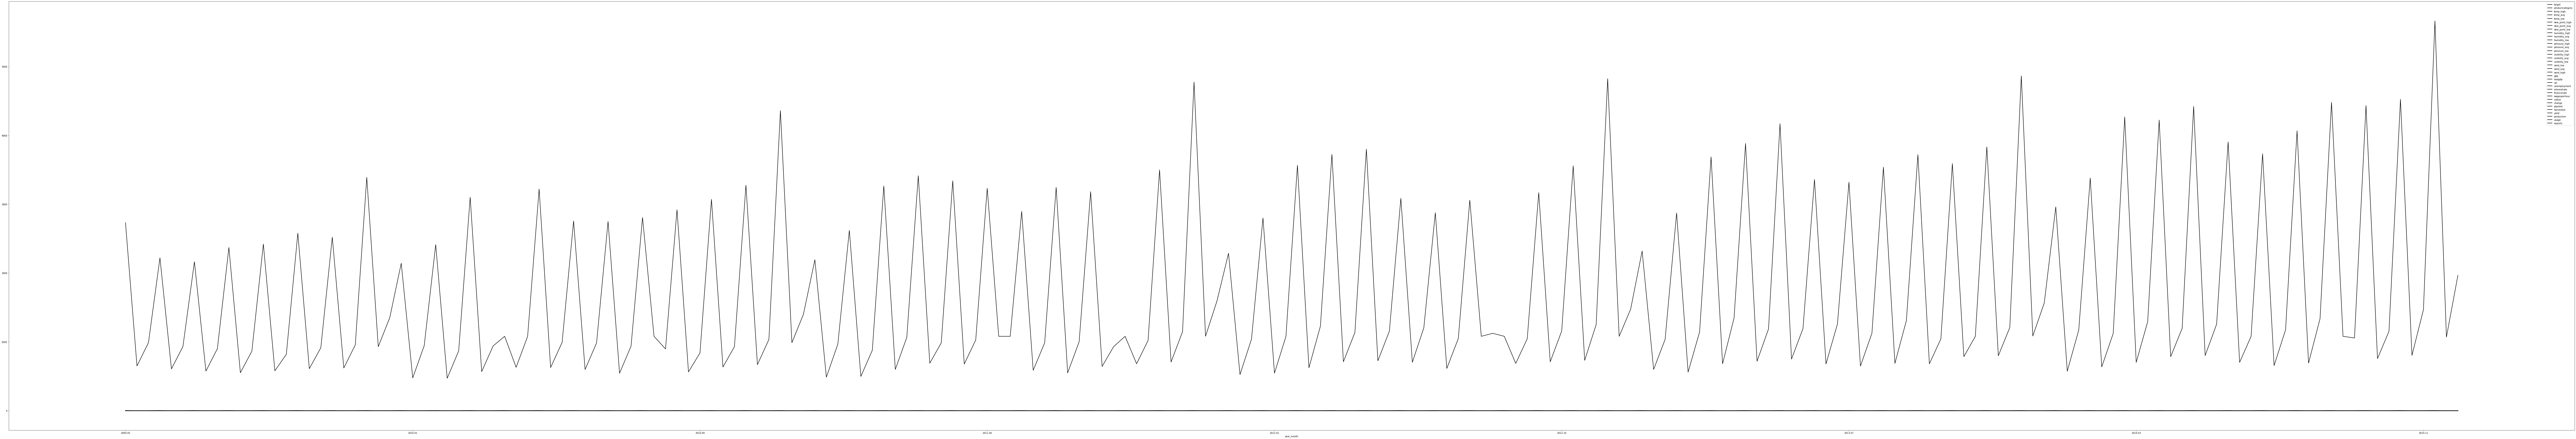

In [88]:
ax = dataset.plot(figsize=(204,35), lw=2, style='k-')
print(ax)

In [89]:
dataset.columns

Index(['target', 'productcategory', 'temp_high', 'temp_avg', 'temp_low',
       'dew_point_high', 'dew_point_avg', 'dew_point_low', 'humidity_high',
       'humidity_avg', 'humidity_low', 'pressure_high', 'pressure_avg',
       'pressure_low', 'visibility_high', 'visibility_avg', 'visibility_low',
       'wind_low', 'wind_avg', 'wind_high', 'gdp', 'realgdp', 'cpi',
       'unemployment', 'interestrate', 'financerate', 'wagesperhour', 'cotton',
       'change', 'planted', 'harvested', 'yield', 'production', 'usage',
       'exports'],
      dtype='object')

In [90]:
X = dataset.iloc[:, 1:35]
y = dataset.iloc[:, 0]

print(X.head())
print(y.head())
print(y.tail())
 


            productcategory  temp_high  ...     usage   exports
year_month                              ...                    
2009-05                   2   0.125213  ... -0.040340  0.182653
2009-05                   0   0.125213  ... -0.040340  0.182653
2009-05                   1   0.125213  ... -0.040340  0.182653
2009-06                   2   0.180257  ... -0.096206 -0.112333
2009-06                   0   0.180257  ... -0.096206 -0.112333

[5 rows x 34 columns]
year_month
2009-05    2732.0
2009-05     650.0
2009-05     989.0
2009-06    2220.0
2009-06     607.0
Name: target, dtype: float64
year_month
2014-11     803.0
2014-11    1468.0
2014-12    5664.0
2014-12    1070.0
2014-12    1967.0
Name: target, dtype: float64


No handles with labels found to put in legend.


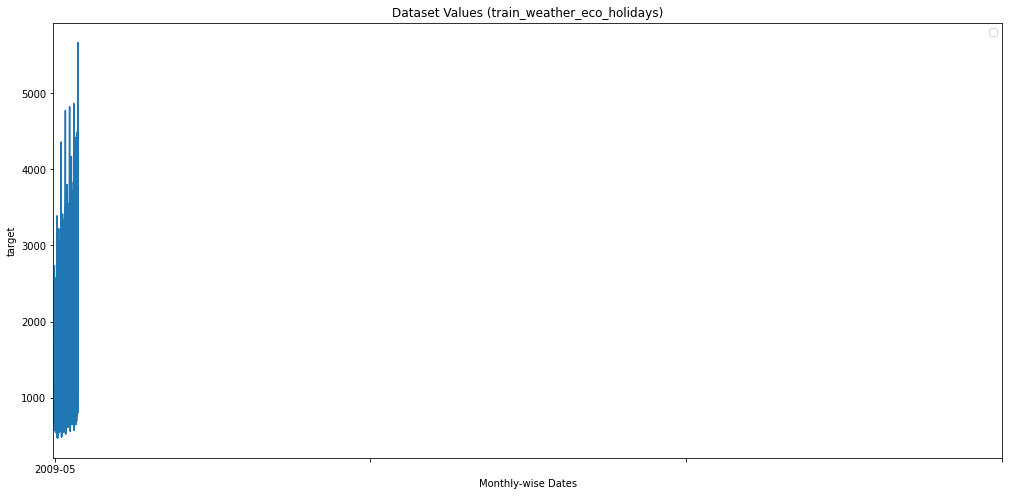

In [91]:
# Plot the closing values for Google
plt.figure(figsize=(17,8))
plt.plot(y)
plt.title('Dataset Values (train_weather_eco_holidays)')
plt.xlabel('Monthly-wise Dates')
plt.ylabel('target')
plt.xticks(np.arange(0,3332, 900), dataset.index[0:3332:900])
plt.legend()

In [93]:
temp = dataset

Text(0.5, 1.0, 'All data exclude the target')

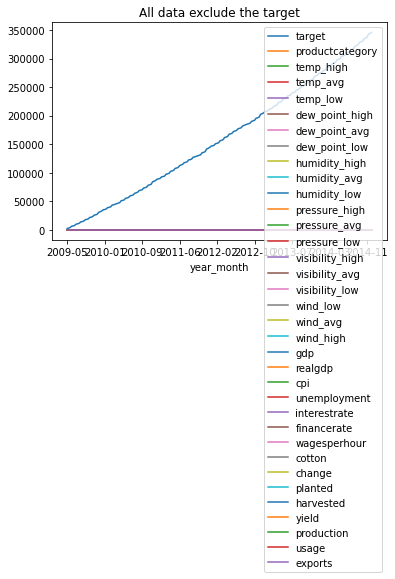

In [94]:
# Return the cumulative sum of the dataframe
temp = temp.cumsum()
temp.plot()
plt.title('All data exclude the target')

Text(0.5, 1.0, 'All data plot')

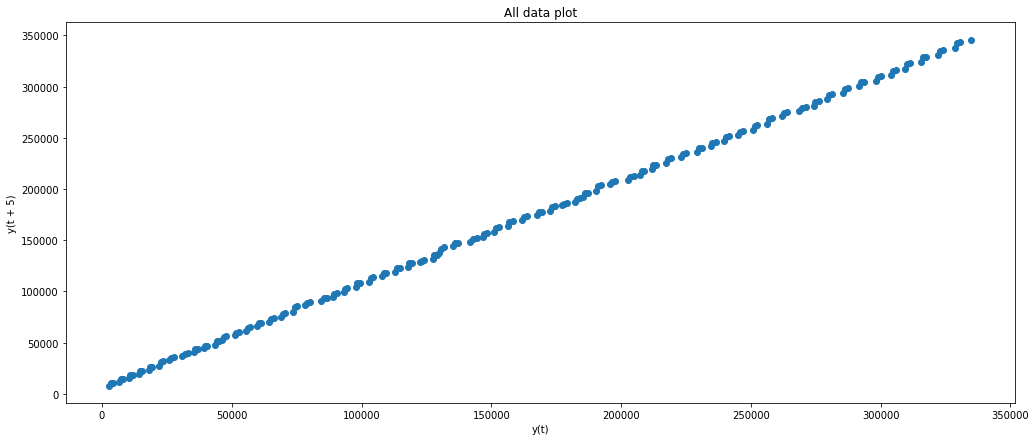

In [95]:
# Find the autocorrelation using lag plot. 
# A lag plot checks whether a data set or time series is random or not.
# Non-random data exhibits an identifiable structure in the lag plot (eg. linear structure).
plt.figure(figsize=(17,7))
lag_plot(temp['target'], lag=5)
plt.title('All data plot')

In [96]:
dataset.tail()

target  productcategory  temp_high  ...  production     usage   exports
year_month                                      ...                                
2014-11      803.0                0  -0.108613  ...    0.181611  0.244576 -0.237701
2014-11     1468.0                1  -0.108613  ...    0.181611  0.244576 -0.237701
2014-12     5664.0                2  -0.175327  ...    0.110053  0.244576 -0.237701
2014-12     1070.0                0  -0.175327  ...    0.110053  0.244576 -0.237701
2014-12     1967.0                1  -0.175327  ...    0.110053  0.244576 -0.237701

[5 rows x 35 columns]

## **First training Mondel**

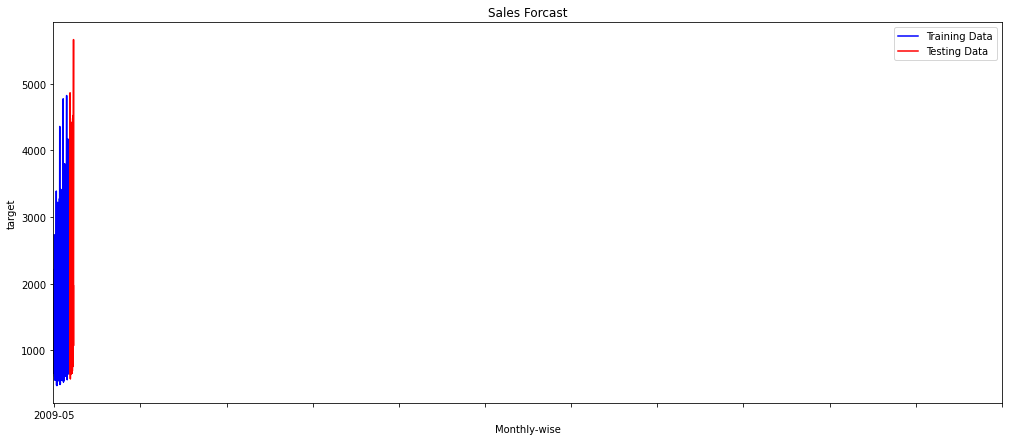

In [97]:
train_data, test_data = dataset[0:int(len(dataset)*0.8)],dataset[int(len(dataset)*0.8):] # Train and test split
plt.figure(figsize=(17,7))
plt.title('Sales Forcast')
plt.xlabel('Monthly-wise')
plt.ylabel('target')
plt.plot(train_data['target'], 'blue', label='Training Data') #Plot train data in blue color
plt.plot(test_data['target'], 'red', label='Testing Data')  # Plot test data in red color
plt.xticks(np.arange(0,3332, 300), train_data.index[0:3332:300])
plt.legend()
plt.show()

### Loss Function

In [ ]:
#root mean sqeure error function
def rmse_manual(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


In [ ]:
#root mean sqeure error function
def rmse_sklearn(predictions, targets):
    return mse(targets, predictions , squared=False)

In [246]:
def rmsesklearn(actual, predicted):
    mse = sklearn.metrics.mean_squared_error(actual, predicted)

    rmse = math.sqrt(mse)
    return float('{:.2f}'.format(rmse))

###ARIMA model

In [ ]:
# ARIMA model
train_ar = train_data['target'].values
test_ar = test_data['target'].values

history = [x for x in train_ar]

predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))   
    # (5, 1, 0) indicates a lag value of 5 for autoregression, a difference order of 1 to make the time series stationary and a moving average model of 0. 
    model_fit = model.fit(disp=0)     
    # Above, disp=0 setting turns off the large amount of debug information provided regarding the fit of the regression model.
    output = model_fit.forecast() # one-step forecast
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = rmse_manual(test_ar, predictions)
print('(ManualCompute) Root Mean  Square error: %.3f' % error)

error = rmse_sklearn(test_ar, predictions)
print('(SklearnCompute) Root Mean  Square error: %.3f' % error)

error = rmsesklearn(test_ar, predictions)
print('(Sklearn) Root Mean  Square error: %.3f' % error)

predicted=851.954695, expected=798.000000
predicted=1118.939763, expected=1209.000000
predicted=3645.886180, expected=4865.000000
predicted=986.630920, expected=1085.000000
predicted=1260.638317, expected=1566.000000
predicted=4387.401440, expected=2961.000000
predicted=905.229537, expected=573.000000
predicted=1376.056989, expected=1172.000000
predicted=3635.558339, expected=3381.000000
predicted=894.418517, expected=636.000000
predicted=1386.812402, expected=1123.000000
predicted=3108.485918, expected=4268.000000
predicted=780.567924, expected=702.000000
predicted=1220.749222, expected=1293.000000
predicted=3816.290435, expected=4223.000000
predicted=771.529359, expected=785.000000
predicted=1281.624966, expected=1196.000000
predicted=4133.518097, expected=4421.000000
predicted=861.517396, expected=801.000000
predicted=1294.302073, expected=1257.000000
predicted=4247.500519, expected=3905.000000
predicted=838.911000, expected=702.000000
predicted=1256.076207, expected=1080.500000
pre

In [ ]:
test_data.shape

(41, 35)

###Compare Prediction with actual

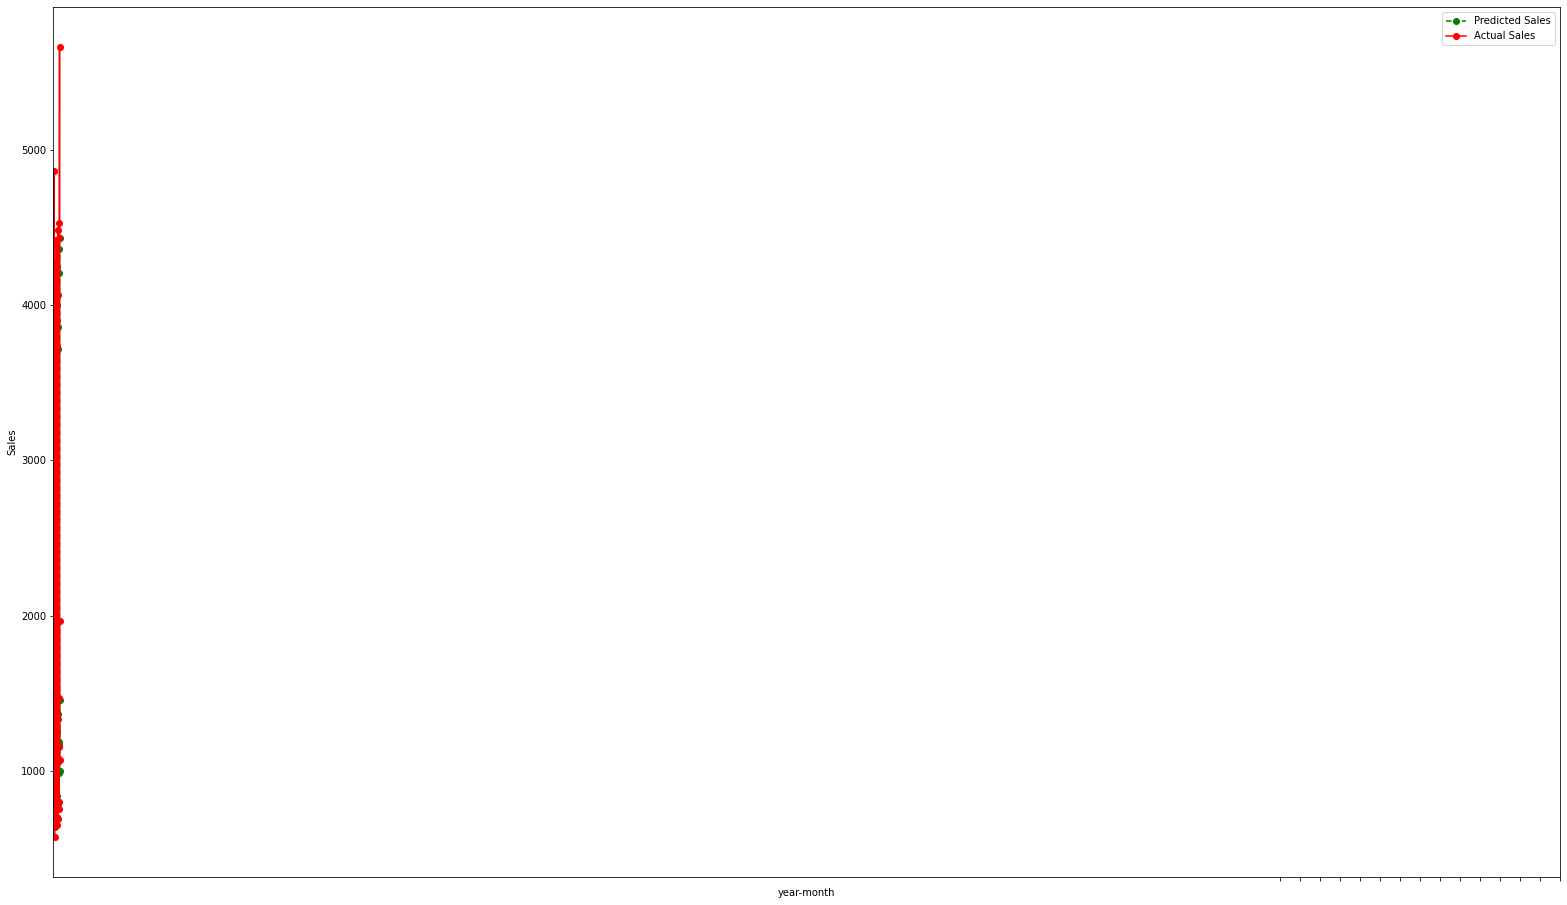

In [ ]:
plt.figure(figsize=(27,16))
#ax3 = plt.subplot(222)
plt.plot(test_data.index, predictions, color='green',marker='o', linestyle='dashed', 
         label='Predicted Sales')
plt.plot(test_data.index, test_data['target'], color='red',marker='o', label='Actual Sales')
plt.xlabel('year-month')
plt.ylabel('Sales')
plt.xticks(np.arange(2700,3332, 44), train_data.index[2700:3332:44])
plt.legend()
plt.show()

##**Second training model - LSTM method**

###Data Wrangling



In [ ]:
df_train_weather_eco_holidays_new

target  productcategory  temp_high  ...   exports  year  month
0    1755.0                2  -0.365570  ...  0.072033  2009      1
1     524.0                0  -0.365570  ...  0.072033  2009      1
2     936.0                1  -0.365570  ...  0.072033  2009      1
3    1729.0                2  -0.217419  ...  0.005662  2009      2
4     496.0                0  -0.217419  ...  0.005662  2009      2
..      ...              ...        ...  ...       ...   ...    ...
211   803.0                0  -0.108613  ... -0.237701  2014     11
212  1468.0                1  -0.108613  ... -0.237701  2014     11
213  5664.0                2  -0.175327  ... -0.237701  2014     12
214  1070.0                0  -0.175327  ... -0.237701  2014     12
215  1967.0                1  -0.175327  ... -0.237701  2014     12

[216 rows x 37 columns]

In [ ]:
df_train_weather_eco_holidays_new.columns

Index(['target', 'productcategory', 'temp_high', 'temp_avg', 'temp_low',
       'dew_point_high', 'dew_point_avg', 'dew_point_low', 'humidity_high',
       'humidity_avg', 'humidity_low', 'pressure_high', 'pressure_avg',
       'pressure_low', 'visibility_high', 'visibility_avg', 'visibility_low',
       'wind_low', 'wind_avg', 'wind_high', 'gdp', 'realgdp', 'cpi',
       'unemployment', 'interestrate', 'financerate', 'wagesperhour', 'cotton',
       'change', 'planted', 'harvested', 'yield', 'production', 'usage',
       'exports', 'year', 'month'],
      dtype='object')

In [ ]:
#importing packages and libraries

#import Keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from datetime import datetime, timedelta,date
from __future__ import division
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as pyoff
import plotly.graph_objs as go



#initiate plotly
pyoff.init_notebook_mode()

#read the data in csv
df_sales = pd.read_csv('/content/df_train_weather_eco_holidays_new.csv', index_col=0) 

#convert date field from string to datetime
df_sales['year-month'] = pd.to_datetime(df_sales['year-month'])

#show first 10 rows
print(df_sales.head(10))

KeyError: ignored

Since, our task is to forecast monthly-wise total sales. We aggregated our data at the year-monthly level.

###Data Transformation to make it stationary and supervised

To model our forecast easier and more accurate, we will do the transformations below:
1. We will convert the data to stationary if it is not

2. Converting from time series to supervised for having the feature set of our LSTM model
3. Scale the data


####First off, how do we check if the data is not stationary? Let’s plot it and see:


In [ ]:
#!pip install plotly --upgrade
 

###Building the LSTM model & evaluation

##**Third Model RNN**

### Steps to follow: 


- The first step is to consolidate the date-time information into a single date-time so that we can use it as an index in Pandas. **(year-month)**

- check missing values



In [ ]:
dataset.columns

Index(['target', 'productcategory', 'temp_high', 'temp_avg', 'temp_low',
       'dew_point_high', 'dew_point_avg', 'dew_point_low', 'humidity_high',
       'humidity_avg', 'humidity_low', 'pressure_high', 'pressure_avg',
       'pressure_low', 'visibility_high', 'visibility_avg', 'visibility_low',
       'wind_low', 'wind_avg', 'wind_high', 'gdp', 'realgdp', 'cpi',
       'unemployment', 'interestrate', 'financerate', 'wagesperhour', 'cotton',
       'change', 'planted', 'harvested', 'yield', 'production', 'usage',
       'exports'],
      dtype='object')

In [ ]:
dataset

target  productcategory  temp_high  ...  production     usage   exports
year_month                                      ...                                
2009-05     2732.0                2   0.125213  ...   -0.336958 -0.040340  0.182653
2009-05      650.0                0   0.125213  ...   -0.336958 -0.040340  0.182653
2009-05      989.0                1   0.125213  ...   -0.336958 -0.040340  0.182653
2009-06     2220.0                2   0.180257  ...   -0.262683 -0.096206 -0.112333
2009-06      607.0                0   0.180257  ...   -0.262683 -0.096206 -0.112333
...            ...              ...        ...  ...         ...       ...       ...
2014-11      803.0                0  -0.108613  ...    0.181611  0.244576 -0.237701
2014-11     1468.0                1  -0.108613  ...    0.181611  0.244576 -0.237701
2014-12     5664.0                2  -0.175327  ...    0.110053  0.244576 -0.237701
2014-12     1070.0                0  -0.175327  ...    0.110053  0.244576 -0.237701
2014-12     1967.0                1  -0.175327  ...    0.110053  0.244576 -0.237701

[204 rows x 35 columns]

In [ ]:
dataset.to_csv('testproduct.csv')

In [ ]:
len(dataset)


204

#####  Data Visualization
we can create a quick plot of each series and see what we have.

plots each series as a separate subplot

In [ ]:
values = dataset.values
print(values.shape)
print(type(values))

(204, 35)
<class 'numpy.ndarray'>


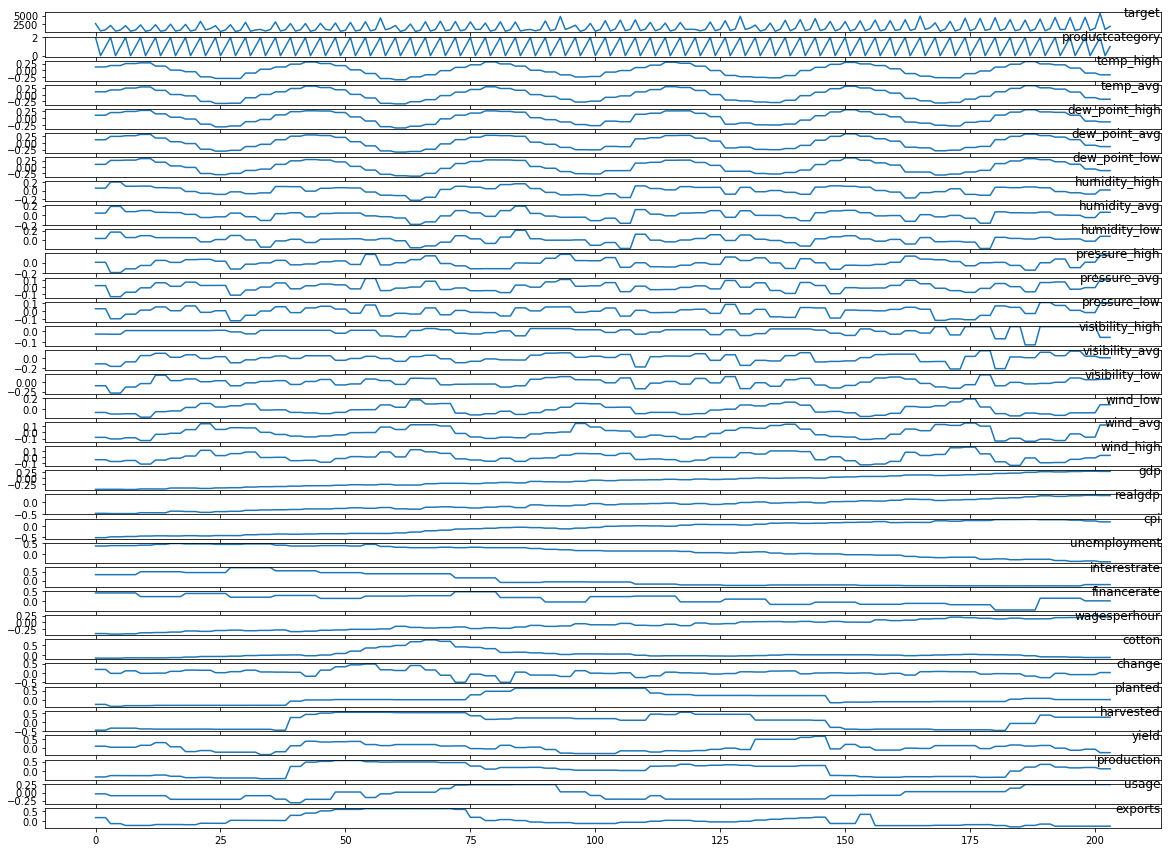

In [ ]:
 #df_sales.values

# Specify columns to plot, skip  year-month column cause it is not numeric
groups = [0,1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
          21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
i = 1

# Plot each column
plt.figure(figsize=(20,15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

###### Preparing Data for Time Series Prediction


We should follow the following steps: 
1. framing the dataset as a supervised learning problem and normalizing the input variables.
2. frame the supervised learning problem as predicting the **Sales** at monthly-wise (**year-month**) given the sales measurement, economic categories, holidays events and weather conditions at the prior time step. So, the input is features at monthly time step (t-1) and output is sales at time t.

3. transform the dataset using the series_to_supervised() function given in code
- Series to supervised function:

- Intuition is in time series forecasting terminology the current time (t) and future times (t+1, t+n) are forecast times and past observations (t-1, t-n) are used to make forecasts.
    - We can see how positive and negative shifts can be used to create a new DataFrame from a time series with sequences of input and output patterns for a supervised learning problem.
    - This permits not only classical X -> y prediction, but also X -> Y where both input and output can be sequences.
    - **The function takes four arguments**:

        1. **data**: Sequence of observations as a list or 2D NumPy array. Required.
        2. **n_in**: Number of lag observations as input (X). Values may be between [1..len(data)] Optional. Defaults to 1.
        3. **n_out**: Number of observations as output (y). Values may be between [0..len(data)-1]. Optional. Defaults to 1.
        4. **dropnan**: Boolean whether or not to drop rows with NaN values. Optional. Defaults to True.
        5. The function **returns Pandas DataFrame of series framed for supervised learning**.



###- Steps to convert the  Time Series to a Supervised Learning Problem are:
    
    1. Load the df_sales.csv” dataset 
    2. Label encoded (integer encoded) if any categorical 
    3. Normalize the Dataset 
    4. Transform the dataset into supervised learning problem by calling the function "series_to_supervised"

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
    n_vars = data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # Forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

#### Convert series to supervised learning

In [ ]:
values = dataset.values
print(values.shape)
print(values)

(204, 35)
[[ 2.73200000e+03  2.00000000e+00  1.25213055e-01 ... -3.36958094e-01
  -4.03398510e-02  1.82652716e-01]
 [ 6.50000000e+02  0.00000000e+00  1.25213055e-01 ... -3.36958094e-01
  -4.03398510e-02  1.82652716e-01]
 [ 9.89000000e+02  1.00000000e+00  1.25213055e-01 ... -3.36958094e-01
  -4.03398510e-02  1.82652716e-01]
 ...
 [ 5.66400000e+03  2.00000000e+00 -1.75327296e-01 ...  1.10052775e-01
   2.44576350e-01 -2.37701266e-01]
 [ 1.07000000e+03  0.00000000e+00 -1.75327296e-01 ...  1.10052775e-01
   2.44576350e-01 -2.37701266e-01]
 [ 1.96700000e+03  1.00000000e+00 -1.75327296e-01 ...  1.10052775e-01
   2.44576350e-01 -2.37701266e-01]]


In [ ]:
# Ensure all data is float
values = values.astype('float32')

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

print(values)

[[ 2.7320000e+03  2.0000000e+00  1.2521306e-01 ... -3.3695808e-01
  -4.0339850e-02  1.8265271e-01]
 [ 6.5000000e+02  0.0000000e+00  1.2521306e-01 ... -3.3695808e-01
  -4.0339850e-02  1.8265271e-01]
 [ 9.8900000e+02  1.0000000e+00  1.2521306e-01 ... -3.3695808e-01
  -4.0339850e-02  1.8265271e-01]
 ...
 [ 5.6640000e+03  2.0000000e+00 -1.7532730e-01 ...  1.1005277e-01
   2.4457635e-01 -2.3770127e-01]
 [ 1.0700000e+03  0.0000000e+00 -1.7532730e-01 ...  1.1005277e-01
   2.4457635e-01 -2.3770127e-01]
 [ 1.9670000e+03  1.0000000e+00 -1.7532730e-01 ...  1.1005277e-01
   2.4457635e-01 -2.3770127e-01]]


In [ ]:
# Previous 1 month features used for framing as supervised learning problem 
# Specify the number of lag month
n_months1 = 1
n_features1 = 35
reframed1 = series_to_supervised(scaled, n_months1, 1)
reframed1.head()

var1(t-1)  var2(t-1)  var3(t-1)  ...  var33(t)  var34(t)  var35(t)
1   0.435394        1.0   0.701674  ...  0.095562      0.49  0.508251
2   0.034469        0.0   0.701674  ...  0.095562      0.49  0.508251
3   0.099750        0.5   0.701674  ...  0.169837      0.39  0.178218
4   0.336800        1.0   0.780422  ...  0.169837      0.39  0.178218
5   0.026189        0.0   0.780422  ...  0.169837      0.39  0.178218

[5 rows x 70 columns]

In [ ]:
# Previous 3 month features used for framing as supervised learning problem 
# Specify the number of lag months
n_months2 = 3
n_features2 = 35
reframed2 = series_to_supervised(scaled, n_months2, 1)
reframed2.head()

var1(t-3)  var2(t-3)  var3(t-3)  ...  var33(t)  var34(t)  var35(t)
3   0.435394        1.0   0.701674  ...  0.169837      0.39  0.178218
4   0.034469        0.0   0.701674  ...  0.169837      0.39  0.178218
5   0.099750        0.5   0.701674  ...  0.169837      0.39  0.178218
6   0.336800        1.0   0.780422  ...  0.167874      0.39  0.079208
7   0.026189        0.0   0.780422  ...  0.167874      0.39  0.079208

[5 rows x 140 columns]

In [ ]:
reframed1.shape, reframed2.shape

((203, 70), (201, 140))

### Split the Dataset into training and testing data

#### **Case1:** Prediction using prev 1 **month** data:
 We will split data into prev 5 **years** data for training and 1 **year** of data for testing



In [ ]:
# First experiment, Split into train and test sets
values1 = reframed1.values
n_train_months1 = 14 * 12 
n_obs1 = n_months1 * n_features1    

In [ ]:
#Second experiment, split into train and test sets
# n_months2 * n_features2 #(uncomment this line and replace)

In [ ]:
# first scenario
print(n_months1, n_features1)
train1 = values1[:n_train_months1, :]
test1 = values1[n_train_months1:, :]

# Split into input and outputs by taking last column "sales" as target" *******note
train_X1, train_y1 = train1[:, :n_obs1], train1[:, -n_features1]
test_X1, test_y1 = test1[:, :n_obs1], test1[:, -n_features1]

train_X_regr = train_X1.reshape((train_X1.shape[0],train_X1.shape[1]))
test_X_regr = test_X1.reshape((test_X1.shape[0], test_X1.shape[1]))

train_y_regr = train_y1
test_y_regr = test_y1
print(train_X_regr.shape, train_y_regr.shape, test_X_regr.shape, test_y_regr.shape)

1 35
(168, 35) (168,) (35, 35) (35,)


### Time Series Prediction Techniques

In [ ]:
# To test whether GPU instance is present in the system of not
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")
device

Using PyTorch version: 1.7.0+cu101 CUDA: True


device(type='cuda')

In [ ]:
class RNNmodel(nn.Module):
  
  def __init__(self,input_dim,hidden_dim):
    super(RNNmodel,self).__init__()

    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.num_layers = 1 # Since there is only one hidden layer in the architecture
    self.output_dim = 1 # We are having a final regression value
    self.batch_size = 1 # We are treating the entire dataset as 1 batch
    
    
    # Laying down the architecture primarily to initialize the RNN function
    self.rnn = nn.RNN(self.input_dim, self.hidden_dim, self.num_layers, batch_first=True)
    self.linear = nn.Linear(self.hidden_dim, self.output_dim)
    
  def forward(self,input,hidden):
    # Reshape input
    input = input.view(1, input.size(0), input.size(1))
    output,hidden_state = self.rnn(input, hidden) # For each inptut row,the otuput would be a 32 dim
    # Now need to iterate through all the outputs and get a single output by passing through linear layer
    # print(output.size(0),output.size(1),output.size())
    out = []
    for timeStep in range(output.size(1)): 
      selectOutput = output[:,timeStep,:]  
      # print("type of output",type(self.linear(selectOutput)))
      out.append(self.linear(selectOutput))# self.linear returns a tensor as the parent is a tensor
    return torch.stack(out, dim=1), hidden_state

In [ ]:
# Make training and test sets in torch
train_X_regr = torch.from_numpy(train_X_regr).type(torch.Tensor)
test_X_regr  = torch.from_numpy(test_X_regr ).type(torch.Tensor)
train_y_regr = torch.from_numpy(train_y_regr).type(torch.Tensor).view(-1)
test_y_regr = torch.from_numpy(test_y_regr).type(torch.Tensor).view(-1)

### Training the RNN

**NOTE:  This could take about 10 to 15 mins to run**</br>
This is a regression problem. Hence we focus on the loss reduction, instead of accuracy measures to evaluate the model.

We will compute rmse

In [ ]:
hidden_d = 32

# Intialize the RNN with the input dimension and hidden dimension
rnnModel = RNNmodel(train_X_regr.size(1),hidden_d)
rnnModel = rnnModel.to(device)

# Create loss criterion
loss_func = nn.MSELoss()
#rmse_cal = math.sqrt(loss_func)

# Create optimizer
optimizer = torch.optim.Adam(rnnModel.parameters(), lr=0.05)

# We are setting the hidden_state to None within the loop and call rnnModel to populate this after the first epoch.
hidden_state = None

hist = np.zeros(50)  # An array for storing history of loss values

# Pushing the data to cuda
train_X_regr = train_X_regr.to(device)
train_y_regr = train_y_regr.to(device)

for epochs in range(30):

  # Call rnn object with (input,"hidden")
  outputs , hidden_state = rnnModel(train_X_regr,hidden_state) # Even though initially it is set to none..

  # The size of the hidden_state is figured out by the network automatically based on the initialization
  hidden_state = hidden_state.data
  hidden_state = hidden_state.to(device)
  outputs = outputs.to(device)
  
  # Calculate loss
  loss = loss_func(outputs.squeeze(), train_y_regr)
  print("Epoch ", epochs, "MSE: ", loss.item(), "RMSE: ", math.sqrt(loss.item()))

  # Storing the loss in an array
  hist[epochs] = loss.item()

  # Set the parameters of gradients to zero
  optimizer.zero_grad()

  # Back propagating the loss
  loss.backward()

  # Adjusting the gradients
  optimizer.step()

Epoch  0 MSE:  0.2050534188747406 RMSE:  0.4528282443429745
Epoch  1 MSE:  2.840883255004883 RMSE:  1.685491991972932
Epoch  2 MSE:  0.057661477476358414 RMSE:  0.24012804391898587
Epoch  3 MSE:  0.3764922022819519 RMSE:  0.6135896041182184
Epoch  4 MSE:  0.1795237511396408 RMSE:  0.42370243230319177
Epoch  5 MSE:  0.059019412845373154 RMSE:  0.24293911345308963
Epoch  6 MSE:  0.07047654688358307 RMSE:  0.2654741925001055
Epoch  7 MSE:  0.1104273721575737 RMSE:  0.33230614222065424
Epoch  8 MSE:  0.07578393071889877 RMSE:  0.2752888132832476
Epoch  9 MSE:  0.0533122681081295 RMSE:  0.23089449562111589
Epoch  10 MSE:  0.0861487165093422 RMSE:  0.2935110159931688
Epoch  11 MSE:  0.08908799290657043 RMSE:  0.29847611781610006
Epoch  12 MSE:  0.05738343670964241 RMSE:  0.23954840160110108
Epoch  13 MSE:  0.06109721586108208 RMSE:  0.24717851011178557
Epoch  14 MSE:  0.08317752182483673 RMSE:  0.2884051348794552
Epoch  15 MSE:  0.06846683472394943 RMSE:  0.26166167989208783
Epoch  16 MSE:  

**The graph below, shows the predicted values in 'blue', and the labels in 'Orange' at a given time.**

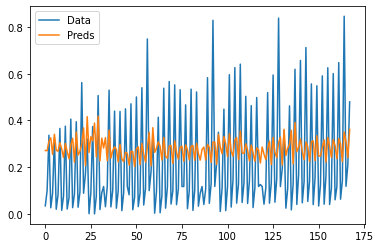

In [ ]:
plt.plot(train_y_regr.detach().cpu().numpy(), label="Data")
plt.plot(outputs.squeeze().detach().cpu().numpy(), label="Preds")
plt.legend()
plt.show()

**The graph below, shows the decrease of Loss with epochs**

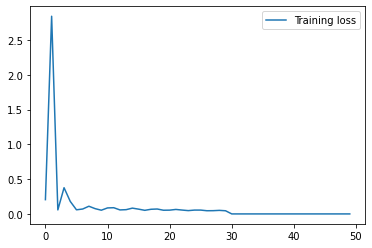

In [ ]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

### Testing the model

In [ ]:
test_hist = np.zeros(5)
hidden_test = None
test_X_regr = test_X_regr.to(device)
test_y_regr = test_y_regr.to(device)

for i in range(5):
  with torch.no_grad():
    outputs,hidden_test = rnnModel(test_X_regr, hidden_test)
    hidden_test = hidden_test.to(device)
    outputs = outputs.to(device)
    loss = loss_func(outputs.squeeze(), test_y_regr)
    print("Epoch ", i, "MSE: ", loss.item() , "RMSE: ", math.sqrt(loss.item()))
    test_hist[i] = loss.item()

Epoch  0 MSE:  0.09637050330638885 RMSE:  0.3104359890643945
Epoch  1 MSE:  0.0946425050497055 RMSE:  0.30764022014311704
Epoch  2 MSE:  0.09460888057947159 RMSE:  0.30758556627298295
Epoch  3 MSE:  0.09460889548063278 RMSE:  0.30758559049577205
Epoch  4 MSE:  0.09460889548063278 RMSE:  0.30758559049577205


##**Traditional ML algorithms**

In [221]:
dataset.head()

target  productcategory  temp_high  ...  production     usage   exports
year_month                                      ...                                
2009-01     1755.0                2  -0.365570  ...    -0.30601  0.685917  0.072033
2009-01      524.0                0  -0.365570  ...    -0.30601  0.685917  0.072033
2009-01      936.0                1  -0.365570  ...    -0.30601  0.685917  0.072033
2009-02     1729.0                2  -0.217419  ...    -0.30601  0.350722  0.005662
2009-02      496.0                0  -0.217419  ...    -0.30601  0.350722  0.005662

[5 rows x 35 columns]

In [ ]:
#!pip3 install catboost



In [237]:
#import libraries
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import GridSearchCV

In [443]:
# XGBRegressor, paramaters are recommended as a grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

###Split the data from dataframe 

In [495]:
dataset_train = dataset.iloc[0:215,:]
dataset_test = dataset.iloc[180:,:]

In [496]:
X_train = dataset_train.iloc[:, 1:].values
y_train = dataset_train.iloc[:, 0].values

In [497]:
X_train, y_train

(array([[ 2.        , -0.36557036, -0.36317278, ..., -0.30601003,
          0.68591713,  0.07203325],
        [ 0.        , -0.36557036, -0.36317278, ..., -0.30601003,
          0.68591713,  0.07203325],
        [ 1.        , -0.36557036, -0.36317278, ..., -0.30601003,
          0.68591713,  0.07203325],
        ...,
        [ 1.        , -0.1086128 , -0.10789474, ...,  0.18161075,
          0.24457635, -0.23770127],
        [ 2.        , -0.1753273 , -0.16795666, ...,  0.11005278,
          0.24457635, -0.23770127],
        [ 0.        , -0.1753273 , -0.16795666, ...,  0.11005278,
          0.24457635, -0.23770127]]),
 array([1755. ,  524. ,  936. , 1729. ,  496. ,  859. , 2256. ,  542. ,
         921. , 2662. ,  669. ,  914. , 2732. ,  650. ,  989. , 2220. ,
         607. ,  932. , 2164. ,  575. ,  901. , 2371. ,  551. ,  865. ,
        2421. ,  579. ,  819. , 2579. ,  610. ,  914. , 2521. ,  620. ,
         955. , 3390. ,  930. , 1351. , 2142. ,  476. ,  945. , 2413. ,
         471.

In [498]:
X_test = dataset_test.iloc[:, 1:].values
y_test = dataset_test.iloc[:, 0].values

In [499]:
X_test.shape, X_test, y_test

((36, 34), array([[ 2.        , -0.28422256, -0.31052632, ..., -0.31174674,
          0.02669926, -0.19345348],
        [ 0.        , -0.28422256, -0.31052632, ..., -0.31174674,
          0.02669926, -0.19345348],
        [ 1.        , -0.28422256, -0.31052632, ..., -0.31174674,
          0.02669926, -0.19345348],
        ...,
        [ 2.        , -0.1753273 , -0.16795666, ...,  0.11005278,
          0.24457635, -0.23770127],
        [ 0.        , -0.1753273 , -0.16795666, ...,  0.11005278,
          0.24457635, -0.23770127],
        [ 1.        , -0.1753273 , -0.16795666, ...,  0.11005278,
          0.24457635, -0.23770127]]), array([2961. ,  573. , 1172. , 3381. ,  636. , 1123. , 4268. ,  702. ,
        1293. , 4223. ,  785. , 1196. , 4421. ,  801. , 1257. , 3905. ,
         702. , 1080.5, 3733. ,  655. , 1175. , 4067. ,  692. , 1337. ,
        4481. , 1080.5, 1056. , 4434. ,  757. , 1153. , 4525. ,  803. ,
        1468. , 5664. , 1070. , 1967. ]))

### Splitting the dataset into the Training set and Test set

In [394]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [407]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_test.size

((215, 34), (36, 34), (215,), (36,), 36)

In [279]:
y_train = y_train.reshape(-1, 1) #np.arange(0,len(y_train),1)
y_train.shape
X_train.shape

(179, 34)

In [337]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [339]:
X_train.shape, X_train

((215, 34), array([[ 1.22190652, -1.77712434, -1.7163306 , ..., -1.03773419,
          3.74644795,  0.08059034],
        [-1.22190652, -1.77712434, -1.7163306 , ..., -1.03773419,
          3.74644795,  0.08059034],
        [ 0.        , -1.77712434, -1.7163306 , ..., -1.03773419,
          3.74644795,  0.08059034],
        ...,
        [ 0.        , -0.53654094, -0.51779665, ...,  0.48149615,
          1.39864589, -1.09582533],
        [ 1.22190652, -0.85863652, -0.7997882 , ...,  0.25855027,
          1.39864589, -1.09582533],
        [-1.22190652, -0.85863652, -0.7997882 , ...,  0.25855027,
          1.39864589, -1.09582533]]))

###models

In [450]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [451]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [452]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [453]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

583.5687927614637
0.7734384631042035
733.6346511113753
0.7767106747294822


In [454]:
#redge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

590.2206603717034
0.7682440574395107
728.7474999262428
0.7796756763953864


In [455]:
#lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

587.4822821662069
0.7703895709482933
727.5199675184258
0.7804172980530498


In [456]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

606.8378164289377
0.7550105755181672
750.5153057905172
0.7663168507106121


In [500]:
# XGBRegressor algorithm
model_xgbr = XGBRegressor(nthread=-1) 
model_xgbr = GridSearchCV(model_xgbr, params)
model_xgbr.fit(X_train, y_train)

[12:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=-1,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'gamma': [0.3, 0.4, 0.5], 'max_dep

In [501]:
y_test_xgbr = model_xgbr.predict(X_test)
y_test_xgbr_score = model_xgbr.score(X_test, y_test)
rmse_xgbr_value = rmsesklearn(y_test_xgbr,y_test)
rmse_xgbr_value

117.78

In [502]:
# RandomForestRegressor
model_rfr = RandomForestRegressor()#100, oob_score = 1,n_jobs = 1,random_state =42
model_rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [503]:
y_test_rfr = model_rfr.predict(X_test)
y_test_rfr_score = model_rfr.score(X_test, y_test)
rmse_rfr_value = rmsesklearn(y_test_rfr,y_test)
rmse_rfr_value

162.62

In [504]:
# CatBoostRegressor
model_cbr = CatBoostRegressor(iterations=2, learning_rate=1, depth=2)
model_cbr.fit(X_train, y_train)

0:	learn: 497.5266403	total: 575us	remaining: 575us
1:	learn: 432.8474990	total: 1.17ms	remaining: 0us


In [505]:
y_test_cbr = model_cbr.predict(X_test)
y_test_cbr_score = model_cbr.score(X_test, y_test)
rmse_cbr_value = rmsesklearn(y_test_cbr, y_test)
rmse_cbr_value

422.61

In [506]:
# LogisticRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [507]:
y_test_lr = model_lr.predict(X_test)
y_test_lr_score = model_lr.score(X_test, y_test)
rmse_lr_value = rmsesklearn(y_test_lr, y_test)
rmse_lr_value

733.63

In [508]:
from sklearn.linear_model import LinearRegression
mlreg = LinearRegression()
mlreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [509]:
y_test_lr = mlreg.predict(X_test)
y_test_lr_score = mlreg.score(X_test, y_test)
rmse_lr_value = rmsesklearn(y_test_lr, y_test)
rmse_lr_value

733.63

In [510]:
from sklearn import linear_model

reglmbr = linear_model.BayesianRidge()
reglmbr.fit(X_train,y_train)




BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [511]:
y_test_lr1 = reglmbr.predict(X_test)
y_test_lr_score1 = reglmbr.score(X_test, y_test)
rmse_lr_value1 = rmsesklearn(y_test_lr, y_test)
rmse_lr_value1

733.63

In [512]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [513]:
y_test_lr2 = knn.predict(X_test)
y_test_lr_score2 = knn.score(X_test, y_test)
rmse_lr_value2 = rmsesklearn(y_test_lr, y_test)
rmse_lr_value2

733.63

In [514]:
# DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=0)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [515]:
y_test_dtr = model_dtr.predict(X_test)
y_test_dtr_score = model_dtr.score(X_test, y_test_dtr)
rmse_dtr_value = rmsesklearn(y_test_dtr, y_test)
rmse_dtr_value

82.0

In [516]:
# LinearRegression
model_lrm = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
model_lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [517]:
y_test_lrm = model_lrm.predict(X_test)
y_test_lrm_score = model_lrm.score(X_test, y_test_lrm)
rmse_lrm_value = rmsesklearn(y_test_lrm, y_test)
rmse_lrm_value

733.63

In [518]:
# GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [519]:
y_test_gbr = model_gbr.predict(X_test)
y_test_gbr_score = model_gbr.score(X_test, y_test_gbr)
rmse_gbr_value = rmsesklearn(y_test_gbr, y_test)
rmse_gbr_value

111.81

In [520]:
# SVR
model_svr = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
model_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [521]:
y_test_svr = model_svr.predict(X_test)
y_test_svr_score = model_svr.score(X_test, y_test_svr)
rmse_svr_value = rmsesklearn(y_test_svr, y_test)
rmse_svr_value

1837.31

In [522]:
# AdaBoostRegressor
model_adb = AdaBoostRegressor()
model_adb.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [523]:
y_test_adb = model_adb.predict(X_test)
y_test_adb_score = model_adb.score(X_test, y_test_adb)
rmse_adb_value = rmsesklearn(y_test_adb, y_test)
rmse_adb_value

302.71

In [524]:
modelreg=linear_model.Ridge()
modelreg.fit(X_train,y_train)
regmodel=modelreg.predict(X_test)



#Y_test=model.predict(x_test)
#y_Predict=list(y_test)


In [525]:
y_test_reg = modelreg.predict(X_test)
y_test_reg_score = modelreg.score(X_test, y_test_reg)
rmse_adb_value = rmsesklearn(y_test_reg, y_test)
rmse_adb_value

749.59

In [526]:
# Data frame result 
models = pd.DataFrame({
    'Model': ['XGBRegressor', 'RandomForestRegressor', 'CatBoostRegressor',
              'LogisticRegression', 'DecisionTreeRegressor', 'LinearRegression',
              'GradientBoostingRegressor', 'SVR', 'AdaBoostRegressor'],

    'RMSE': [rmse_xgbr_value, rmse_rfr_value, rmse_cbr_value,
             rmse_lr_value, rmse_dtr_value, rmse_lrm_value,
             rmse_gbr_value, rmse_svr_value, rmse_adb_value]})
models.index = np.arange(1, len(models)+1) # starting index from 1
models.sort_values(by='RMSE', ascending=True)




Model     RMSE
5      DecisionTreeRegressor    82.00
7  GradientBoostingRegressor   111.81
1               XGBRegressor   117.78
2      RandomForestRegressor   162.62
3          CatBoostRegressor   422.61
4         LogisticRegression   733.63
6           LinearRegression   733.63
9          AdaBoostRegressor   749.59
8                        SVR  1837.31

###PCA feature extraction

In [436]:
import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [437]:
X_train.shape

(215, 34)

In [438]:
X_train1 = X_train

## Update the test CSV submition file 

In [527]:
#y_xgbr_test =  '{:.2f}'.format()
results_xgb = pd.DataFrame(data={'Sales(In ThousandDollars)':y_test_dtr}) 
results_xgb.index = np.arange(1, len(results_xgb)+1) # We added 1 since the starting index from 0  
results_xgb.index.name = "Year" # index header name
results_xgb.to_csv('results_dt_82.csv')
results_xgb

Sales(In ThousandDollars)
Year                           
1                        2961.0
2                         573.0
3                        1172.0
4                        3381.0
5                         636.0
6                        1123.0
7                        4268.0
8                         702.0
9                        1293.0
10                       4223.0
11                        785.0
12                       1196.0
13                       4421.0
14                        801.0
15                       1257.0
16                       3905.0
17                        702.0
18                       1080.5
19                       3733.0
20                        655.0
21                       1175.0
22                       4067.0
23                        692.0
24                       1337.0
25                       4481.0
26                       1080.5
27                       1056.0
28                       4434.0
29                        757.0
30                       1153.0
31                       4525.0
32                        803.0
33                       1468.0
34                       5664.0
35                       1070.0
36                       1475.0

##Update preprocessing


## **Stage 3:** Each time you submit in kaggle, ensure that the code given by you in Stage2 gives the same result. Follow the steps for the validation:
### a) Enter your Kaggle RMSE in the form below 
### b) After entering RMSE below, go to File->'Save and pin revision' (To ensure you do so, you are asked to mark 'Yes' to the instruction asking the same)
**Note: The Shortcut for 'Save and pin revision' is Ctrl+M+S**</br>
**Note: You can check if the action has succeeded by going to File->Revision History and you'll find the "PIN" checkbox checked if successful.** 


- This action ensures there is 'proof of code' for each submission you make.
- If you submit your results in Kaggle, and get a leaderboard RMSE score, but you don't follow the steps asked above, then your **score will NOT be considered**, as we don't have the proof of your code. (We map the 'proof of code' by mapping it to your "RMSE+Time of save+pin"). In other words, if you want your RMSE score to be considered you have to follow the process. 
- However, for trial submission (RMSE scores you don't care about being considered, as you're still experimenting in your initial attempts) you don't have to follow the process above.
- **One member from your team can collect all your team-members colab shared links and email them to aimlkaggle@gmail.com as per deadlines.** Ensure to give edit access to aimlkaggle@gmail.com.
- **FINALLY: "Do NOT download and reupload this file as all the revision history will be lost"**




/\
[\,]iO|:># Submit your RMSE value below:

Eg:   RMSEValue:     234.07

In [528]:
#@title Submission details are:

RMSEValue = '82.00' #@param {type:"string"}
Execute_Save_and_Pin_revision_now = 'Yes' #@param ['Yes','No']
